In [1]:
import pywt
import matplotlib.pyplot as plt
import numpy
import random
import cv2
import scipy
import skimage
import PIL
import image_similarity_measures
import image_similarity_measures.evaluate
import gc
gc.collect()

D:\Python\Python311\Lib\site-packages\phasepack\tools.py:11: UserWarning: 
Module 'pyfftw' (FFTW Python bindings) could not be imported. To install it, try
running 'pip install pyfftw' from the terminal. Falling back on the slower
'fftpack' module for 2D Fourier transforms.
  warnings.warn("""


0

In [2]:
# cA, cD = pywt.dwt(data= pywt.data.camera(), wavelet= "db1", mode= "periodization", axis= -1)
cA, cD = pywt.dwt(data= [1, 2, 3, 4], wavelet= "db1", mode= "periodization", axis= -1)
cA, cD

(array([2.12132034, 4.94974747]), array([-0.70710678, -0.70710678]))

Shape of original image is : (512, 512, 3)
Shapes of 1st level DWT coefficients are : (256, 256) (256, 256) (256, 256) (256, 256)


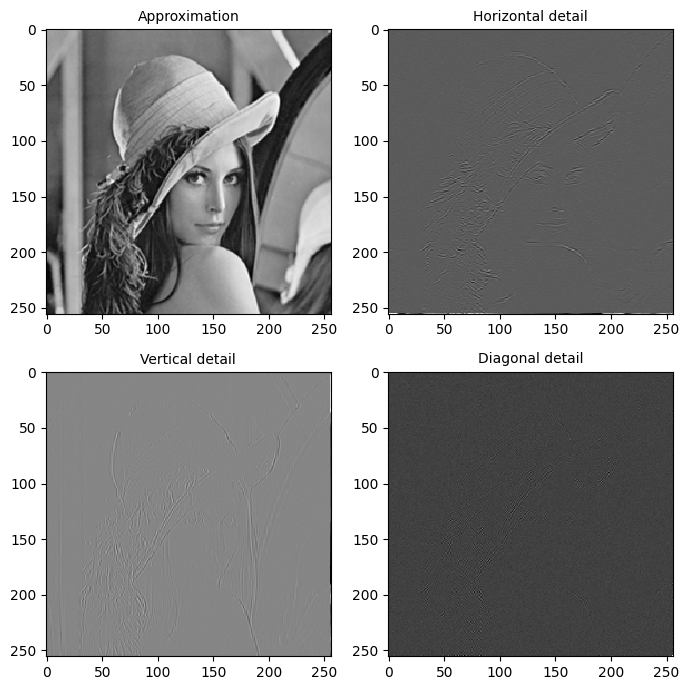

In [3]:
# Applying single level digital wavelet transform to an image and plotting approximation & details
original_image= cv2.imread(filename= r"C:\Users\TYSON\Desktop\Capture\Lena.png")
original_image= cv2.resize(src= original_image, dsize= (512, 512))
print("Shape of original image is :", original_image.shape)
gray_image= cv2.cvtColor(src= original_image, code= cv2.COLOR_BGR2GRAY)

coefficients= pywt.dwt2(data= gray_image, wavelet= "db3", mode= "periodization", axes= (-2, -1))
cA, (cH, cV, cD)= coefficients
print("Shapes of 1st level DWT coefficients are :", cA.shape, cH.shape, cV.shape, cD.shape)
reconstructed_image= pywt.idwt2(coeffs= coefficients, wavelet= "db3", mode= "periodization", axes= (-2, -1))
plt.figure(figsize= (7, 7))
plt.subplot(2, 2, 1)
plt.imshow(X= cA, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Approximation", fontsize= 10)

plt.subplot(2, 2, 2)
plt.imshow(X= cH, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Horizontal detail", fontsize= 10)

plt.subplot(2, 2, 3)
plt.imshow(X= cV, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Vertical detail", fontsize= 10)

plt.subplot(2, 2, 4)
plt.imshow(X= cD, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Diagonal detail", fontsize= 10)
plt.tight_layout()
plt.show()

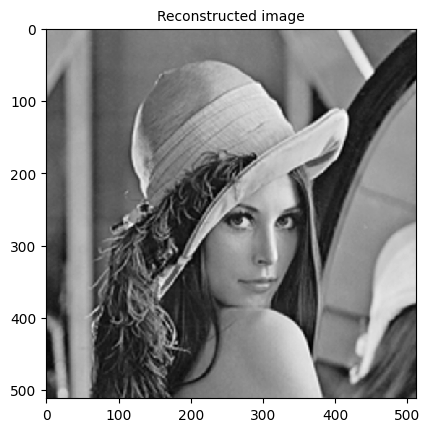

In [4]:
plt.imshow(X= reconstructed_image, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Reconstructed image", fontsize= 10)
plt.show()

In [5]:
del (cA, cH, cV, cD, coefficients)

Shape of original image is : (512, 512, 3)
Shapes of 1st level DWT coefficients are : (256, 256) (256, 256) (256, 256)
Shapes of 2nd level DWT coefficients are : (128, 128) (128, 128) (128, 128) (128, 128)


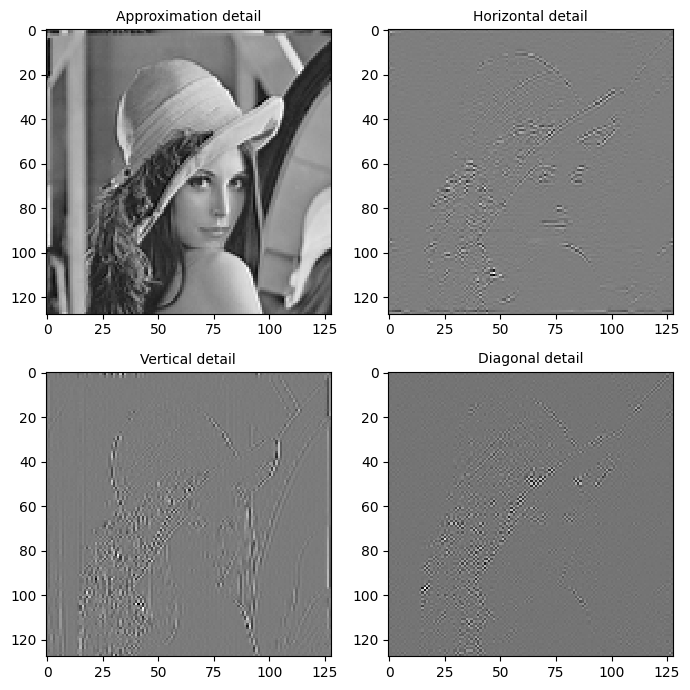

In [6]:
# Applying double level digital wavelet transform to an image and plotting approximation and details
original_image= cv2.imread(filename= r"C:\Users\TYSON\Desktop\Capture\Lena.png")
original_image= cv2.resize(src= original_image, dsize= (512, 512))
print("Shape of original image is :", original_image.shape)
gray_image= cv2.cvtColor(src= original_image, code= cv2.COLOR_BGR2GRAY)
coefficients= pywt.wavedec2(data= gray_image, wavelet= "db5", mode= "periodization", level= 2, axes= (-2, -1))
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)= coefficients
print("Shapes of 1st level DWT coefficients are :", cH1.shape, cV1.shape, cD1.shape)
print("Shapes of 2nd level DWT coefficients are :", cA2.shape, cH2.shape, cV2.shape, cD2.shape)
reconstructed_image= pywt.waverec2(coeffs= coefficients, wavelet= "db5", mode= "periodization", axes= (-2, -1))
plt.figure(figsize= (7, 7))
plt.subplot(2, 2, 1)
plt.imshow(X= cA2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Approximation detail", fontsize= 10)

plt.subplot(2, 2, 2)
plt.imshow(X= cH2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Horizontal detail", fontsize= 10)

plt.subplot(2, 2, 3)
plt.imshow(X= cV2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Vertical detail", fontsize= 10)

plt.subplot(2, 2, 4)
plt.imshow(X= cD2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Diagonal detail", fontsize= 10)
plt.tight_layout()
plt.show()

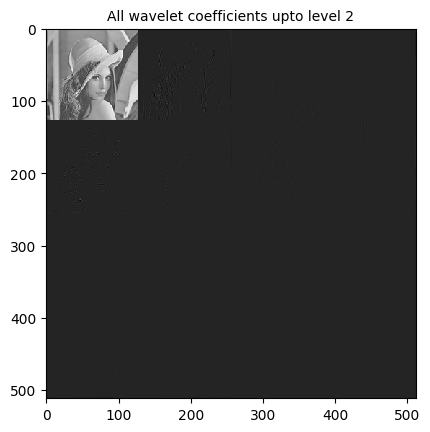

In [7]:
# Plotting all wavelet coefficients as one concatenated matrix
array, coefficient_slices= pywt.coeffs_to_array(coeffs= coefficients, padding= 0, axes= None)
plt.imshow(X= array, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "All wavelet coefficients upto level 2", fontsize= 10)
plt.show()

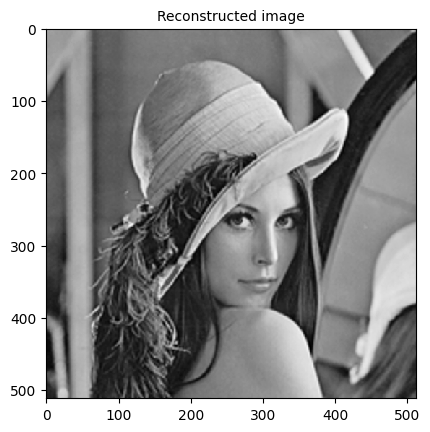

In [8]:
plt.imshow(X= reconstructed_image, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Reconstructed image", fontsize= 10)
plt.show()

In [9]:
# del (cH2, cV2, cD2, cH1, cV1, cD1, coefficients)

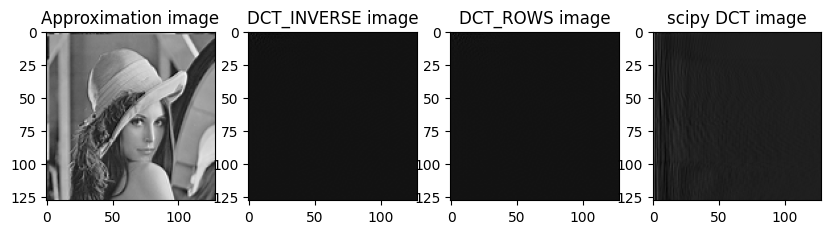

In [10]:
# Applying DCT on approximation sub- band
plt.figure(figsize= (10, 5))
plt.subplot(1, 4, 1)
plt.imshow(X= cA2, cmap= plt.cm.gray)
plt.title("Approximation image")
imf = numpy.float32(cA2) # float conversion
dst = cv2.dct(imf, cv2.DCT_INVERSE)
plt.subplot(1, 4, 2)
plt.imshow(X= dst, cmap= plt.cm.gray)
plt.title("DCT_INVERSE image")
dct = cv2.dct(imf, cv2.DCT_ROWS)
plt.subplot(1, 4, 3)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("DCT_ROWS image")
dct= scipy.fft.dct(x= cA2, type= 2, n= None)
plt.subplot(1, 4, 4)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("scipy DCT image")
plt.show()

In [11]:
dct_image= scipy.fft.dct(x= cA2, type= 2, n= None)
dct_image.shape

(128, 128)

In [12]:
dct_image

array([[ 1.18832896e+05, -7.50986487e+03, -6.93528658e+03, ...,
        -4.18566754e+02,  1.49554037e+02,  3.63446675e+02],
       [ 1.15348811e+05, -8.56630095e+03, -9.46666393e+03, ...,
        -3.47591548e+02,  4.23128827e+02,  4.92249363e+01],
       [ 1.31914019e+05, -3.37179086e+03, -1.29211391e+03, ...,
        -1.55239497e+02,  1.61337105e+02, -7.50647434e+01],
       ...,
       [ 1.13147310e+05, -8.49981868e+03, -6.34915452e+03, ...,
         2.65383647e+02,  1.92886921e+02,  5.31623065e+02],
       [ 1.14258398e+05, -8.38205200e+03, -7.66933537e+03, ...,
         5.46649055e-01, -8.72834074e+02, -2.25447030e+02],
       [ 1.14741592e+05, -8.78365918e+03, -8.15447301e+03, ...,
        -2.36687386e+02, -7.12427403e+02,  8.41734742e+00]])

In [13]:
# I'(i, j) = I(i, j) + (@ x W(i, j))

In [14]:
watermark_image = cv2.imread(filename= r"C:\Users\TYSON\Desktop\Capture\Watermark.png")
watermark_image= cv2.resize(src= watermark_image, dsize= (32, 32), interpolation=cv2.INTER_AREA)
watermark_image= cv2.cvtColor(src= watermark_image, code= cv2.COLOR_BGR2GRAY)
watermark_image.shape

(32, 32)

In [15]:
watermark_image

array([[123, 110, 111, ..., 111, 111, 111],
       [ 13,   0,   0, ...,   0,   0,   0],
       [ 24,   0,   0, ...,   0,   0,   1],
       ...,
       [ 24,   0,   0, ...,   0,   0,   1],
       [ 12,   0,   0, ...,   0,   0,   0],
       [125, 110, 112, ..., 112, 112, 113]], dtype=uint8)

(32, 32)


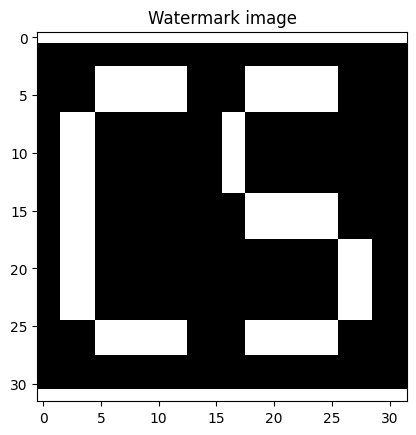

In [16]:
threshold= 100
watermark_image_2= watermark_image.copy()
for i in range(len(watermark_image_2)):
    for j in range(len(watermark_image_2[i])):
        if watermark_image_2[i][j] < threshold:
            watermark_image_2[i][j]= 0
        else:
            watermark_image_2[i][j]= 1
print(watermark_image_2.shape)
plt.imshow(X= watermark_image_2, cmap= plt.cm.gray)
plt.title("Watermark image")
plt.show()

In [17]:
# dct_image= dct_image.astype(dtype= int)

In [18]:
watermark_image_3= watermark_image_2.reshape((32*32))
print(watermark_image_3.shape)
print(watermark_image_3)

(1024,)
[1 1 1 ... 1 1 1]


In [19]:
dct_image_2= dct_image.ravel()
print(dct_image_2.shape)
dct_image_2

(16384,)


array([ 1.18832896e+05, -7.50986487e+03, -6.93528658e+03, ...,
       -2.36687386e+02, -7.12427403e+02,  8.41734742e+00])

In [20]:
# dct_image_3= dct_image_2.copy()
# for i in range(watermark_image_3.shape[0]):
#     if watermark_image_3[i] == 0:
#         if dct_image_3[i] % 2 == 0:
#             pass
#         else:
#             dct_image_3[i] += 1
#     elif watermark_image_3[i] == 1:
#         if dct_image_3[i] % 2 == 1:
#             pass
#         else:
#             dct_image_3[i] += 1
# dct_image_3= dct_image_3.reshape((128, 128))
# print(dct_image_3.shape)
# plt.imshow(X= dct_image_3, cmap= plt.cm.gray)
# plt.title("New DCT image")
# plt.show()

In [21]:
dct_indexes_dict= {}
n= 0
for i in range(0, dct_image_2.shape[0], (4* 4)):
    dct_indexes_dict[n]= [None, None]
    negative_flag, positive_flag= False, False
    for j in range(i, i+ (8* 8)):
        if negative_flag == False and dct_image_2[j] < 0:
            dct_indexes_dict[n][0]= j
            negative_flag= True
        elif positive_flag == False and dct_image_2[j] >= 0:
            dct_indexes_dict[n][1]= j
            positive_flag= True
    if negative_flag == False or positive_flag == False:
        print(n)
    n += 1
print(dct_indexes_dict)

{0: [1, 0], 1: [16, 17], 2: [38, 32], 3: [48, 53], 4: [65, 64], 5: [80, 82], 6: [98, 96], 7: [115, 112], 8: [129, 128], 9: [146, 144], 10: [166, 160], 11: [176, 186], 12: [193, 192], 13: [211, 208], 14: [224, 225], 15: [240, 241], 16: [257, 256], 17: [272, 273], 18: [293, 288], 19: [305, 304], 20: [321, 320], 21: [336, 337], 22: [353, 352], 23: [368, 371], 24: [385, 384], 25: [400, 401], 26: [419, 416], 27: [433, 432], 28: [450, 448], 29: [464, 465], 30: [481, 480], 31: [497, 496], 32: [513, 512], 33: [528, 529], 34: [544, 545], 35: [561, 560], 36: [635, 576], 37: [635, 592], 38: [635, 608], 39: [635, 624], 40: [641, 640], 41: [656, 657], 42: [672, 673], 43: [689, 688], 44: [710, 704], 45: [724, 720], 46: [736, 737], 47: [759, 752], 48: [769, 768], 49: [784, 785], 50: [800, 801], 51: [816, 817], 52: [842, 832], 53: [849, 848], 54: [891, 864], 55: [891, 880], 56: [897, 896], 57: [912, 913], 58: [928, 929], 59: [944, 946], 60: [963, 960], 61: [977, 976], 62: [1006, 992], 63: [1014, 1008]

In [22]:
def calculate_mse_psnr(image_1, image_2, max_pixel):                # PSNR = 20*log10(MAX)-10*log10(MSE)
    differences= numpy.subtract(image_1, image_2)  # Compute the difference between corresponding pixels
    squared_differences= numpy.square(differences)  # Get the square of the differences
    mean_squared_error= numpy.mean(squared_differences)   # Compute the mean squared error
    psnr_score= 20 * numpy.log10(max_pixel) - 10 * numpy.log10(mean_squared_error)
    print("Mean squared error is :", round(mean_squared_error, 4), "and PSNR score is :", round(psnr_score, 4))

def calculate_nc_score(original_watermark_image, watermark_image_new):
    first_list= original_watermark_image.ravel().tolist()
    second_list= watermark_image_new.ravel().tolist()
    numerator= sum([(first_list[i]*second_list[i]) for i in range(len(first_list))])
    denominator= (sum(first_list) ** 0.5) * (sum(second_list) ** 0.5)
    nc_score= (numerator/ denominator)
    return round(nc_score, 4)

def calculate_correlation_coefficient(X, Y):
    n = X.size
    sum_X = X.sum()
    sum_Y = Y.sum()
    sum_XY = (X*Y).sum()
    squareSum_X = (X*X).sum()
    squareSum_Y = (Y*Y).sum()
    corr = (n * sum_XY - sum_X * sum_Y)/(numpy.sqrt((n * squareSum_X - sum_X * sum_X)* (n * squareSum_Y - sum_Y * sum_Y))) 
    return round(corr, 4)

In [23]:
def fitness_function(dct_image, cH2, cV2, cD2, cH1, cV1, cD1):
    original_image= cv2.imread(filename= r"C:\Users\TYSON\Desktop\Capture\Lena.png")
    original_image= cv2.resize(src= original_image, dsize= (512, 512))
    original_image= cv2.cvtColor(src= original_image, code= cv2.COLOR_BGR2GRAY)
    original_watermark_image= watermark_image_2.copy()
    minimum= min(dct_image.ravel())
    minimum= round(minimum, 4)
    maximum= max(dct_image.ravel())
    maximum= round(maximum, 4)
    print("Minimum and Maximum values are :", minimum, maximum, "\n")
    strength_factor_list= []
    corr_coeff_list= []
    for i in range(50):
        strength_factor= round(random.uniform(a= minimum, b= maximum), 4)
        strength_factor_list.append(strength_factor)
        print(i+ 1, ". Strength factor is :", strength_factor)
        # Embedding watermark in image
        dct_image_3= dct_image.ravel().copy()
        extraction_indexes_list= []
        for i in range(watermark_image_3.shape[0]):
            if watermark_image_3[i] == 0:
                dct_image_3[dct_indexes_dict[i][1]] += strength_factor
                extraction_indexes_list.append(dct_indexes_dict[i][1])
            elif watermark_image_3[i] == 1:
                dct_image_3[dct_indexes_dict[i][0]] -= strength_factor
                extraction_indexes_list.append(dct_indexes_dict[i][0])
        dct_image_3= dct_image_3.reshape((128, 128))
        # Applying IDCT
        inverse_dct_image= scipy.fft.idct(x= dct_image_3, type= 2, n= None)
        # Applying IDWT
        coefficients= inverse_dct_image, (cH2, cV2, cD2), (cH1, cV1, cD1)
        inverse_dwt_image= pywt.waverec2(coeffs= coefficients, wavelet= "db5", mode= "periodization", axes= (-2, -1))
        watermarked_image= inverse_dwt_image.copy()
        corr_coeff_1= calculate_correlation_coefficient(original_image.astype(dtype= "float32").ravel(), watermarked_image.ravel())
        print("Correlation coefficient between Original image and attacked image is :", corr_coeff_1)
        # Applying attacks on watermarked image : Gaussian filter
        attacked_image= watermarked_image.copy()
        gaussian_blur_image = cv2.GaussianBlur(src= attacked_image, ksize= (5, 5), sigmaX= cv2.BORDER_DEFAULT)
        calculate_mse_psnr(original_image, gaussian_blur_image, max_pixel= 255)
        # Applying 2 level Digital Wavelet Transform to the attacked image and plotting approximation and details
        coefficients= pywt.wavedec2(data= gaussian_blur_image, wavelet= "db5", mode= "periodization", level= 2, axes= (-2, -1))
        cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)= coefficients
        # Applying DCT on approximation sub- band
        dct_image= scipy.fft.dct(x= cA2, type= 2, n= None)
        dct_image_2= dct_image.ravel()
        watermark_image_list= []
        for i in range(len(extraction_indexes_list)):
            if dct_image_2[extraction_indexes_list[i]] < 0:
                watermark_image_list.append(1)
            elif dct_image_2[extraction_indexes_list[i]] >= 0:
                watermark_image_list.append(0)
        watermark_image_new= numpy.array(watermark_image_list).reshape((32, 32))
        # Comparing original watermark and new watermark image
        corr_coeff_2= calculate_correlation_coefficient(original_watermark_image.ravel(), watermark_image_new.ravel())
        print("Correlation coefficient between Original watermark and extracted watermark is :", corr_coeff_2)
        corr_coeff_list.append((corr_coeff_1+ corr_coeff_2))
        calculate_mse_psnr(original_watermark_image, watermark_image_new, max_pixel= 1)
        nc_score= calculate_nc_score(original_watermark_image, watermark_image_new)
        print("Normalized correlation score is :", nc_score, "\n")
    max_corr_coeff= max(corr_coeff_list)
    print("Maximum correlation coefficient is :", max_corr_coeff, "at strength factor :", strength_factor_list[corr_coeff_list.index(max_corr_coeff)])

In [24]:
fitness_function(dct_image, cH2, cV2, cD2, cH1, cV1, cD1)

Minimum and Maximum values are : -20664.0146 149584.0198 

1 . Strength factor is : -9883.8853
Correlation coefficient between Original image and attacked image is : 0.7583
Mean squared error is : 857.4618 and PSNR score is : 18.7987
Correlation coefficient between Original watermark and extracted watermark is : -0.7602
Mean squared error is : 0.8867 and PSNR score is : 0.5221
Normalized correlation score is : 0.0344 

2 . Strength factor is : 113904.9489
Correlation coefficient between Original image and attacked image is : 0.2343
Mean squared error is : 90705.0462 and PSNR score is : -1.4455
Correlation coefficient between Original watermark and extracted watermark is : 1.0
Mean squared error is : 0.0 and PSNR score is : inf
Normalized correlation score is : 1.0 

3 . Strength factor is : 114784.238
Correlation coefficient between Original image and attacked image is : 0.1992
Mean squared error is : 333594.1145 and PSNR score is : -7.1014
Correlation coefficient between Original wate

C:\Users\TYSON\AppData\Local\Temp\ipykernel_10816\1573497541.py:5: RuntimeWarning: divide by zero encountered in log10
  psnr_score= 20 * numpy.log10(max_pixel) - 10 * numpy.log10(mean_squared_error)


Correlation coefficient between Original watermark and extracted watermark is : 1.0
Mean squared error is : 0.0 and PSNR score is : inf
Normalized correlation score is : 1.0 

7 . Strength factor is : 76966.8
Correlation coefficient between Original image and attacked image is : 0.2025
Mean squared error is : 1596764.8419 and PSNR score is : -13.9016
Correlation coefficient between Original watermark and extracted watermark is : 1.0
Mean squared error is : 0.0 and PSNR score is : inf
Normalized correlation score is : 1.0 

8 . Strength factor is : 87604.0919
Correlation coefficient between Original image and attacked image is : 0.2043
Mean squared error is : 1947201.0833 and PSNR score is : -14.7633
Correlation coefficient between Original watermark and extracted watermark is : 1.0
Mean squared error is : 0.0 and PSNR score is : inf
Normalized correlation score is : 1.0 

9 . Strength factor is : 12821.3775
Correlation coefficient between Original image and attacked image is : 0.216
Me

In [25]:
# Calculating Embedding Strength Factor using Spider Monkey Optimization (SMO) algorithm
class SpiderMonkey:
    def __init__(self, position):
        self.position = position  # Position in the parameter space
        self.fitness = float('inf')

def initialize_population(num_monkeys, param_range):
    return [SpiderMonkey(numpy.random.uniform(param_range[0], param_range[1], size=param_range[2])) for _ in range(num_monkeys)]

def evaluate_fitness(image, params):
    # Simple fitness function: here, we are calculating a mock fitness based on parameters
    embedding_strength = numpy.mean(params)  # Placeholder for embedding strength
    return -embedding_strength  # Minimize the negative embedding strength

def update_position(monkey, best_position, alpha=0.5):
    # Update the position based on the best found position
    monkey.position += alpha * (best_position - monkey.position) + numpy.random.normal(0, 0.1, size=monkey.position.shape)

def find_best(population):
    best_monkey = min(population, key=lambda m: m.fitness)
    return best_monkey.position

def spider_monkey_optimization(image, num_monkeys=10, max_iter=100, param_range=(0, 1, 3)):
    population = initialize_population(num_monkeys, param_range)
    for _ in range(max_iter):
        for monkey in population:
            monkey.fitness = evaluate_fitness(image, monkey.position)
        best_position = find_best(population)
        for monkey in population:
            update_position(monkey, best_position)
    return best_position

def calculate_embedding_strength(image, embedding_params):
    # Placeholder logic for calculating the embedding strength factor
    strength_factor = numpy.mean(embedding_params)  # Modify as necessary
    return round(strength_factor, 3)

# Main Execution
if __name__ == "__main__":
    # Load the image
    original_image= cv2.imread(filename= r"C:\Users\TYSON\Desktop\Capture\Lena.png")
    original_image= cv2.resize(src= original_image, dsize= (512, 512))
    gray_image= cv2.cvtColor(src= original_image, code= cv2.COLOR_BGR2GRAY)
    image= gray_image
    # Apply Spider Monkey Optimization
    optimized_params = spider_monkey_optimization(image)
    # Calculate the embedding strength factor
    embedding_strength_factor = calculate_embedding_strength(image, optimized_params)
    print(f'Optimized Parameters: {optimized_params}')
    print(f'Embedding Strength Factor: {embedding_strength_factor}')

Optimized Parameters: [5.30670792 5.56913456 6.44978507]
Embedding Strength Factor: 5.775


1024
(128, 128)


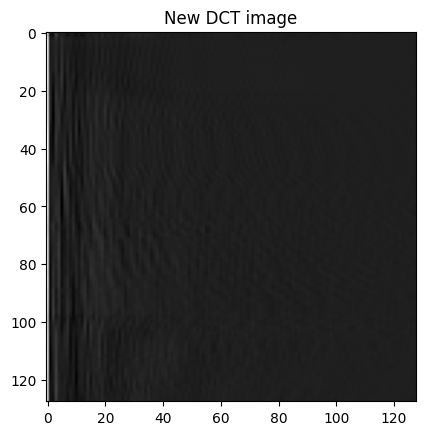

In [26]:
# Embedding watermark in image
dct_image_3= dct_image_2.copy()
extraction_indexes_list= []
for i in range(watermark_image_3.shape[0]):
    if watermark_image_3[i] == 0:
        dct_image_3[dct_indexes_dict[i][1]] += embedding_strength_factor
        extraction_indexes_list.append(dct_indexes_dict[i][1])
    elif watermark_image_3[i] == 1:
        dct_image_3[dct_indexes_dict[i][0]] -= embedding_strength_factor
        extraction_indexes_list.append(dct_indexes_dict[i][0])
dct_image_3= dct_image_3.reshape((128, 128))
print(len(extraction_indexes_list))
print(dct_image_3.shape)
plt.imshow(X= dct_image_3, cmap= plt.cm.gray)
plt.title("New DCT image")
plt.show()

In [27]:
print(dct_image_3.shape)
dct_image_3

(128, 128)


array([[ 1.18832896e+05, -7.51563987e+03, -6.93528658e+03, ...,
        -4.18566754e+02,  1.49554037e+02,  3.63446675e+02],
       [ 1.15348811e+05, -8.57207595e+03, -9.46666393e+03, ...,
        -3.47591548e+02,  4.23128827e+02,  4.92249363e+01],
       [ 1.31914019e+05, -3.37756586e+03, -1.29211391e+03, ...,
        -1.55239497e+02,  1.61337105e+02, -7.50647434e+01],
       ...,
       [ 1.13147310e+05, -8.50559368e+03, -6.34915452e+03, ...,
         2.65383647e+02,  1.92886921e+02,  5.31623065e+02],
       [ 1.14258398e+05, -8.38782700e+03, -7.66933537e+03, ...,
         5.46649055e-01, -8.72834074e+02, -2.25447030e+02],
       [ 1.14741592e+05, -8.78943418e+03, -8.15447301e+03, ...,
        -2.36687386e+02, -7.12427403e+02,  8.41734742e+00]])

In [28]:
# dct_image + (0.05 * watermark_image)

In [29]:
# plt.figure(figsize= (10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(X= dct_image, cmap= plt.cm.gray)
# plt.title("Approximation sub-band DCT image")
# watermark_image = cv2.imread(filename= r"C:\Users\TYSON\Desktop\Capture\Watermark.png")
# watermark_image= cv2.resize(src= watermark_image, dsize= (32, 32), interpolation=cv2.INTER_AREA)
# watermark_image= cv2.cvtColor(src= watermark_image, code= cv2.COLOR_BGR2GRAY)
# h_img, w_img = dct_image.shape
# h_wm, w_wm = watermark_image.shape
# top_y = int(h_img/2 - h_wm/2)
# left_x = int(w_img/2 - w_wm/2)
# bottom_y = top_y + h_wm
# right_x = left_x + w_wm
# new_dct_image= dct_image.copy()
# roi = new_dct_image[top_y: bottom_y, left_x: right_x]
# result = cv2.addWeighted(src1= roi, alpha= 1, src2= watermark_image, beta= 0.3, gamma= 0)
# new_dct_image[top_y: bottom_y, left_x: right_x] = result
# cv2.imwrite(filename= r"C:\Users\TYSON\Desktop\Capture\Watermarked_image.png", img= new_dct_image)
# plt.subplot(1, 2, 2)
# plt.imshow(X= cv2.cvtColor(src= new_dct_image, code= cv2.COLOR_BGR2RGB))
# plt.title("Watermarked DCT image")
# plt.show()

(128, 128)


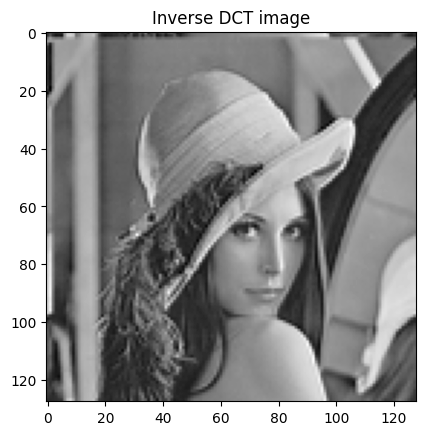

In [30]:
# Applying IDCT
inverse_dct_image= scipy.fft.idct(x= dct_image_3, type= 2, n= None)
print(inverse_dct_image.shape)
plt.imshow(X= inverse_dct_image, cmap= plt.cm.gray)
plt.title("Inverse DCT image")
plt.show()

In [31]:
# Applying IDWT
coefficients= inverse_dct_image, (cH2, cV2, cD2), (cH1, cV1, cD1)
inverse_dwt_image= pywt.waverec2(coeffs= coefficients, wavelet= "db5", mode= "periodization", axes= (-2, -1))
print(inverse_dwt_image.shape)

(512, 512)


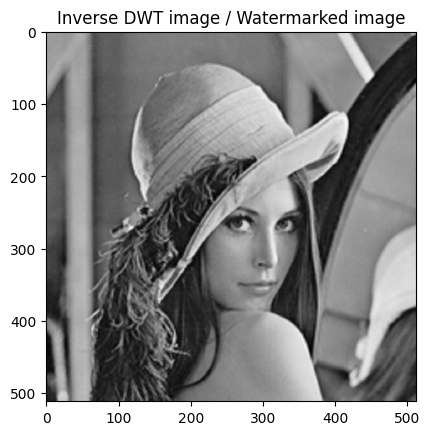

In [32]:
watermarked_image= inverse_dwt_image.copy()
plt.imshow(X= watermarked_image, cmap= plt.cm.gray)
plt.title("Inverse DWT image / Watermarked image")
plt.show()

In [33]:
cv2.imwrite(filename= r"C:\Users\TYSON\Desktop\Capture\Watermarked_image.png", img= watermarked_image)

True

In [34]:
PIL.Image.fromarray(obj= watermarked_image).save(r"C:\Users\TYSON\Desktop\Capture\Watermarked_image.tiff")

In [35]:
original_image= cv2.imread(filename= r"C:\Users\TYSON\Desktop\Capture\Lena.png")
original_image= cv2.resize(src= original_image, dsize= (512, 512))
original_image= cv2.cvtColor(src= original_image, code= cv2.COLOR_BGR2GRAY)
original_image.shape

(512, 512)

In [36]:
# Comapring original and watermarked image
calculate_mse_psnr(original_image, watermarked_image, max_pixel= 255)

Mean squared error is : 0.0005 and PSNR score is : 81.262


In [37]:
psnr_score= skimage.metrics.peak_signal_noise_ratio(original_image, watermarked_image)
print("PSNR score is :", psnr_score)

PSNR score is : 81.26195441008937


C:\Users\TYSON\AppData\Local\Temp\ipykernel_10816\3200564880.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_score= skimage.metrics.peak_signal_noise_ratio(original_image, watermarked_image)


In [38]:
# image_similarity_measures.evaluate.evaluation(org_img_path= r"C:\Users\TYSON\Desktop\Capture\Lena.png", 
#            pred_img_path= r"C:\Users\TYSON\Desktop\Capture\Watermarked_image.png", metrics= ["rmse", "psnr"])

In [39]:
# image_similarity_measures.quality_metrics.rmse(org_img= original_image, pred_img= watermarked_image)

In [40]:
del watermarked_image

In [41]:
watermarked_image= numpy.array(object= PIL.Image.open(fp= r"C:\Users\TYSON\Desktop\Capture\Watermarked_image.tiff", mode= "r"))

In [42]:
print(watermarked_image.shape)
watermarked_image

(512, 512)


array([[161.9764  , 161.97426 , 160.97862 , ..., 161.03442 , 149.02931 ,
        141.00218 ],
       [161.97609 , 161.974   , 160.97832 , ..., 165.03458 , 152.02942 ,
        144.0021  ],
       [161.97589 , 161.97375 , 160.97804 , ..., 170.03423 , 157.02904 ,
        149.00182 ],
       ...,
       [ 44.977036,  45.974693,  48.97965 , ..., 101.03376 , 100.02841 ,
        100.00189 ],
       [ 43.97659 ,  46.974365,  48.97931 , ..., 103.034386, 104.02896 ,
        104.001976],
       [ 42.976463,  45.974304,  48.978966, ..., 104.03455 , 105.02927 ,
        106.00214 ]], dtype=float32)

In [43]:
original_watermark_image= watermark_image_2.copy()

In [44]:
print(original_watermark_image.shape)
original_watermark_image

(32, 32)


array([[1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [45]:
# Applying attacks on watermarked image
# 1. No attack
attacked_image= watermarked_image.copy()

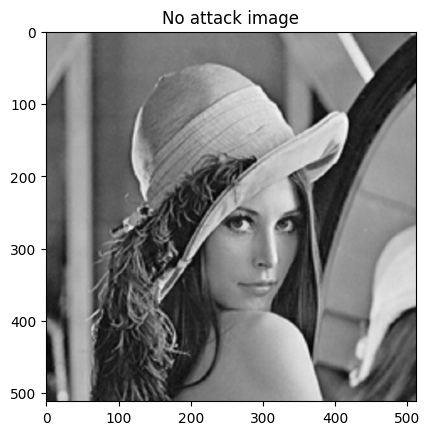

In [46]:
plt.title("No attack image")
plt.imshow(attacked_image, cmap= plt.cm.gray)
plt.show()

In [47]:
calculate_mse_psnr(original_image, attacked_image, max_pixel= 255)

Mean squared error is : 0.0005 and PSNR score is : 81.262


Shape of the attacked image is : (512, 512)
Shapes of 1st level DWT coefficients are : (256, 256) (256, 256) (256, 256)
Shapes of 2nd level DWT coefficients are : (128, 128) (128, 128) (128, 128) (128, 128)


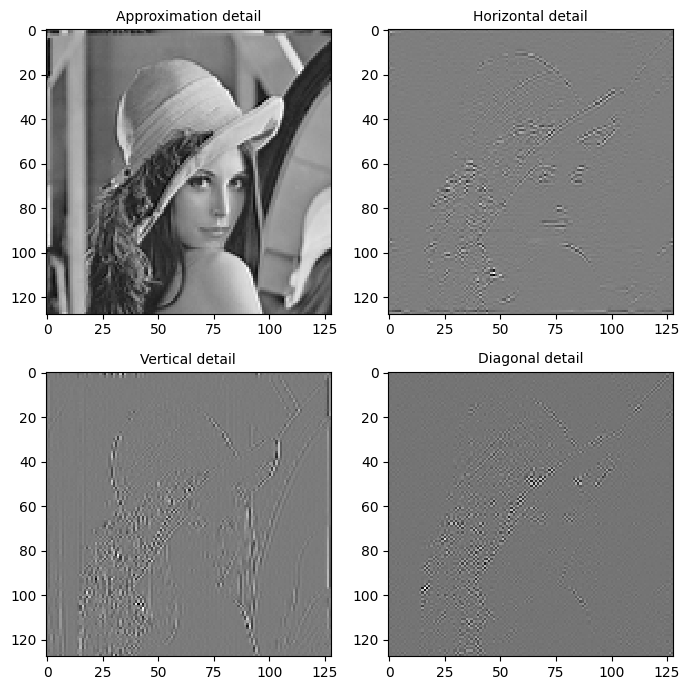

In [48]:
# Applying 2 level Digital Wavelet Transform to the attacked image and plotting approximation and details
print("Shape of the attacked image is :", attacked_image.shape)
coefficients= pywt.wavedec2(data= attacked_image, wavelet= "db5", mode= "periodization", level= 2, axes= (-2, -1))
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)= coefficients
print("Shapes of 1st level DWT coefficients are :", cH1.shape, cV1.shape, cD1.shape)
print("Shapes of 2nd level DWT coefficients are :", cA2.shape, cH2.shape, cV2.shape, cD2.shape)
plt.figure(figsize= (7, 7))
plt.subplot(2, 2, 1)
plt.imshow(X= cA2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Approximation detail", fontsize= 10)

plt.subplot(2, 2, 2)
plt.imshow(X= cH2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Horizontal detail", fontsize= 10)

plt.subplot(2, 2, 3)
plt.imshow(X= cV2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Vertical detail", fontsize= 10)

plt.subplot(2, 2, 4)
plt.imshow(X= cD2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Diagonal detail", fontsize= 10)
plt.tight_layout()
plt.show()

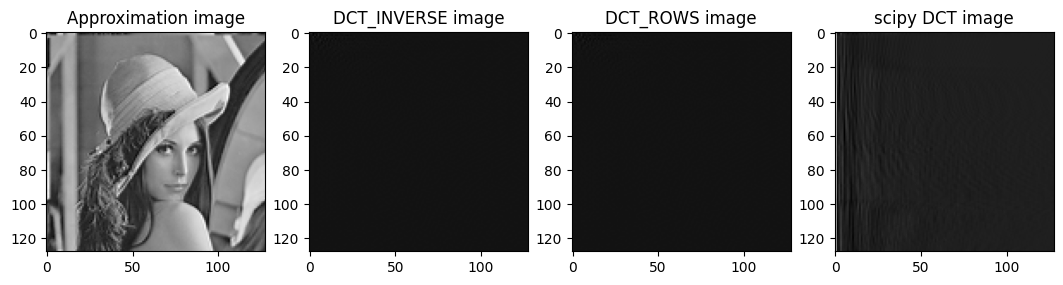

In [49]:
# Applying DCT on approximation sub- band
plt.figure(figsize= (13, 5))
plt.subplot(1, 4, 1)
plt.imshow(X= cA2, cmap= plt.cm.gray)
plt.title("Approximation image")
imf = numpy.float32(cA2) # float conversion
dst = cv2.dct(imf, cv2.DCT_INVERSE)
plt.subplot(1, 4, 2)
plt.imshow(X= dst, cmap= plt.cm.gray)
plt.title("DCT_INVERSE image")
dct = cv2.dct(imf, cv2.DCT_ROWS)
plt.subplot(1, 4, 3)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("DCT_ROWS image")
dct= scipy.fft.dct(x= cA2, type= 2, n= None)
plt.subplot(1, 4, 4)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("scipy DCT image")
plt.show()

In [50]:
dct_image= scipy.fft.dct(x= cA2, type= 2, n= None)
# dct_image= dct_image.astype(dtype= int)
print(dct_image.shape)

(128, 128)


In [51]:
dct_image

array([[ 1.1883291e+05, -7.5156396e+03, -6.9352871e+03, ...,
        -4.1856836e+02,  1.4955420e+02,  3.6344702e+02],
       [ 1.1534882e+05, -8.5720762e+03, -9.4666660e+03, ...,
        -3.4758984e+02,  4.2312891e+02,  4.9225098e+01],
       [ 1.3191403e+05, -3.3775659e+03, -1.2921133e+03, ...,
        -1.5524072e+02,  1.6133771e+02, -7.5065186e+01],
       ...,
       [ 1.1314731e+05, -8.5055938e+03, -6.3491548e+03, ...,
         2.6538379e+02,  1.9288672e+02,  5.3162305e+02],
       [ 1.1425841e+05, -8.3878281e+03, -7.6693354e+03, ...,
         5.4589844e-01, -8.7283447e+02, -2.2544678e+02],
       [ 1.1474160e+05, -8.7894355e+03, -8.1544741e+03, ...,
        -2.3668848e+02, -7.1242822e+02,  8.4189453e+00]], dtype=float32)

In [52]:
# for i in range(len(dct_image)):
#     for j in range(len(dct_image[i])):
#         dct_image[i][j]= round(dct_image[i][j])
# print(dct_image.shape)

In [53]:
dct_image_2= dct_image.reshape((128* 128))
print(dct_image_2.shape)
dct_image_2

(16384,)


array([ 1.1883291e+05, -7.5156396e+03, -6.9352871e+03, ...,
       -2.3668848e+02, -7.1242822e+02,  8.4189453e+00], dtype=float32)

In [54]:
watermark_image_list= []
for i in range(len(extraction_indexes_list)):
    if dct_image_2[extraction_indexes_list[i]] < 0:
        watermark_image_list.append(1)
    elif dct_image_2[extraction_indexes_list[i]] >= 0:
        watermark_image_list.append(0)
watermark_image_new= numpy.array(watermark_image_list).reshape((32, 32))
watermark_image_new.shape

(32, 32)

In [55]:
# Comparing original watermark and new watermark image
nc_score= calculate_nc_score(original_watermark_image, watermark_image_new)
print("Normalized correlation score is :", nc_score)
calculate_mse_psnr(original_watermark_image, watermark_image_new, max_pixel= 1)

Normalized correlation score is : 1.0
Mean squared error is : 0.0 and PSNR score is : inf


C:\Users\TYSON\AppData\Local\Temp\ipykernel_10816\1573497541.py:5: RuntimeWarning: divide by zero encountered in log10
  psnr_score= 20 * numpy.log10(max_pixel) - 10 * numpy.log10(mean_squared_error)


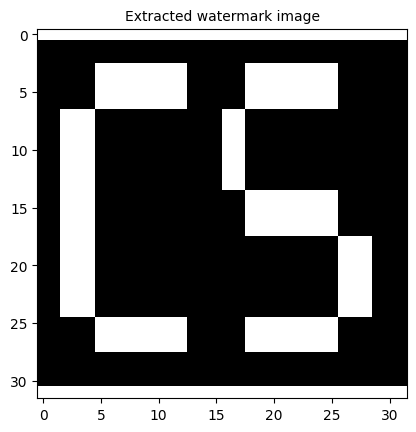

In [56]:
plt.imshow(X= watermark_image_new, cmap= plt.cm.gray)
plt.title(label= "Extracted watermark image", fontsize= 10)
plt.show()

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

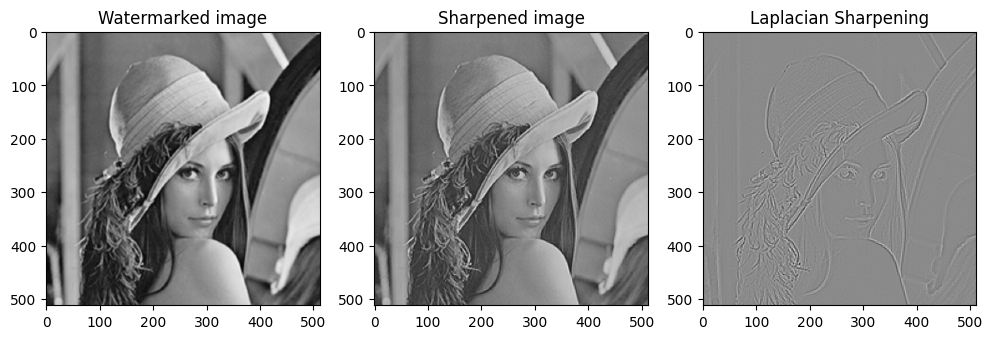

In [57]:
# Applying attacks on watermarked image
# 2. Sharpening
attacked_image= watermarked_image.copy()
plt.figure(figsize= (12, 5))
plt.subplot(1, 3, 1)
plt.title("Watermarked image")
plt.imshow(X= attacked_image, cmap= plt.cm.gray)
kernel = numpy.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_image = cv2.filter2D(src= attacked_image, ddepth= -1, kernel= kernel)
plt.subplot(1, 3, 2)
plt.title("Sharpened image")
plt.imshow(sharpened_image, cmap= plt.cm.gray)
sharpened_image_2 = cv2.Laplacian(src= attacked_image, ddepth= cv2.CV_32F)
plt.subplot(1, 3, 3)
plt.title("Laplacian Sharpening")
plt.imshow(sharpened_image_2, cmap= plt.cm.gray)
plt.show()

In [58]:
calculate_mse_psnr(original_image, sharpened_image, max_pixel= 255)

Mean squared error is : 63.9746 and PSNR score is : 30.0707


Shape of the attacked image is : (512, 512)
Shapes of 1st level DWT coefficients are : (256, 256) (256, 256) (256, 256)
Shapes of 2nd level DWT coefficients are : (128, 128) (128, 128) (128, 128) (128, 128)


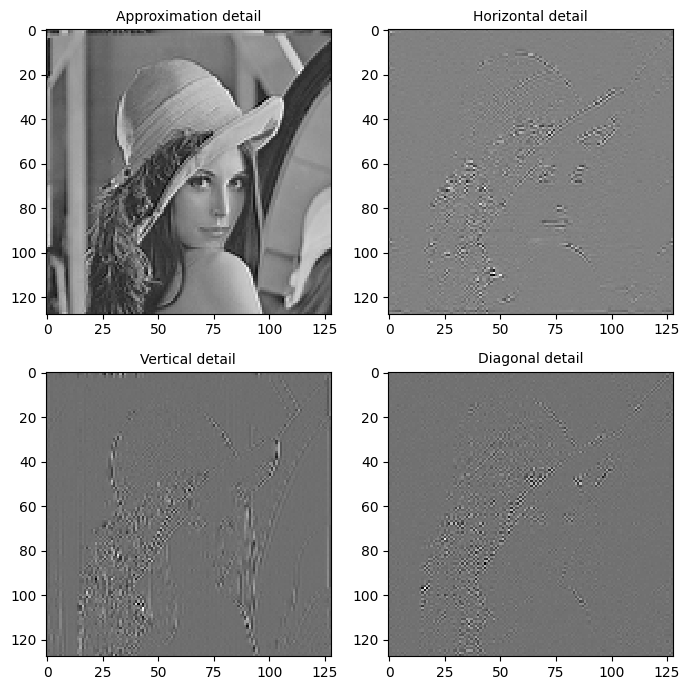

In [59]:
# Applying 2 level Digital Wavelet Transform to the attacked image and plotting approximation and details
print("Shape of the attacked image is :", sharpened_image.shape)
coefficients= pywt.wavedec2(data= sharpened_image, wavelet= "db5", mode= "periodization", level= 2, axes= (-2, -1))
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)= coefficients
print("Shapes of 1st level DWT coefficients are :", cH1.shape, cV1.shape, cD1.shape)
print("Shapes of 2nd level DWT coefficients are :", cA2.shape, cH2.shape, cV2.shape, cD2.shape)
plt.figure(figsize= (7, 7))
plt.subplot(2, 2, 1)
plt.imshow(X= cA2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Approximation detail", fontsize= 10)

plt.subplot(2, 2, 2)
plt.imshow(X= cH2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Horizontal detail", fontsize= 10)

plt.subplot(2, 2, 3)
plt.imshow(X= cV2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Vertical detail", fontsize= 10)

plt.subplot(2, 2, 4)
plt.imshow(X= cD2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Diagonal detail", fontsize= 10)
plt.tight_layout()
plt.show()

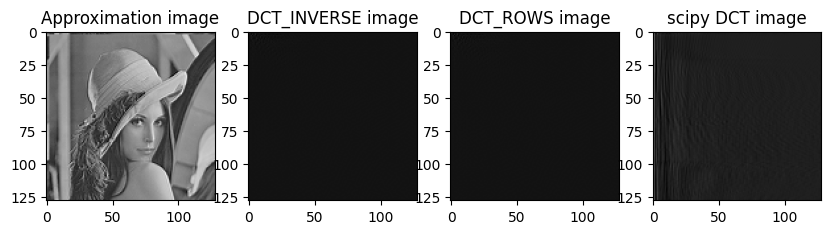

In [60]:
# Applying DCT on approximation sub- band
plt.figure(figsize= (10, 5))
plt.subplot(1, 4, 1)
plt.imshow(X= cA2, cmap= plt.cm.gray)
plt.title("Approximation image")
imf = numpy.float32(cA2) # float conversion
dst = cv2.dct(imf, cv2.DCT_INVERSE)
plt.subplot(1, 4, 2)
plt.imshow(X= dst, cmap= plt.cm.gray)
plt.title("DCT_INVERSE image")
dct = cv2.dct(imf, cv2.DCT_ROWS)
plt.subplot(1, 4, 3)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("DCT_ROWS image")
dct= scipy.fft.dct(x= cA2, type= 2, n= None)
plt.subplot(1, 4, 4)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("scipy DCT image")
plt.show()

In [61]:
dct_image= scipy.fft.dct(x= cA2, type= 2, n= None)
# dct_image= dct_image.astype(dtype= int)
print(dct_image.shape)

(128, 128)


In [62]:
# for i in range(len(dct_image)):
#     for j in range(len(dct_image[i])):
#         dct_image[i][j]= round(dct_image[i][j])
# print(dct_image.shape)

In [63]:
dct_image_2= dct_image.reshape((128* 128))
print(dct_image_2.shape)
dct_image_2

(16384,)


array([ 1.1897569e+05, -7.4806543e+03, -6.8669873e+03, ...,
       -3.5844336e+02, -1.1537896e+03,  2.2414062e+01], dtype=float32)

In [64]:
watermark_image_list= []
for i in range(len(extraction_indexes_list)):
    if dct_image_2[extraction_indexes_list[i]] < 0:
        watermark_image_list.append(1)
    elif dct_image_2[extraction_indexes_list[i]] >= 0:
        watermark_image_list.append(0)
watermark_image_new= numpy.array(watermark_image_list).reshape((32, 32))
watermark_image_new.shape

(32, 32)

In [65]:
# Comparing original watermark and new watermark image
nc_score= calculate_nc_score(original_watermark_image, watermark_image_new)
print("Normalized correlation score is :", nc_score)
calculate_mse_psnr(original_watermark_image, watermark_image_new, max_pixel= 1)

Normalized correlation score is : 0.9751
Mean squared error is : 0.0146 and PSNR score is : 18.3421


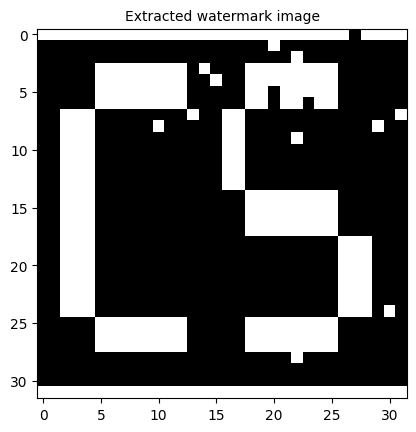

In [66]:
plt.imshow(X= watermark_image_new, cmap= plt.cm.gray)
plt.title(label= "Extracted watermark image", fontsize= 10)
plt.show()

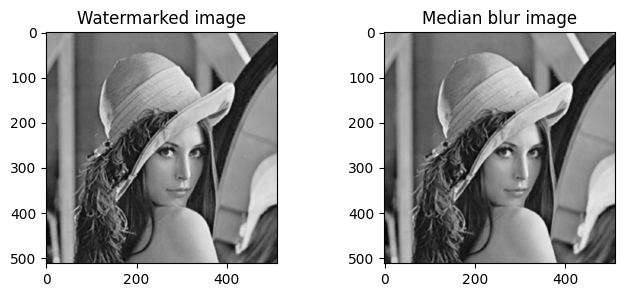

In [67]:
# Applying attacks on watermarked image
# 3. Median filter
attacked_image= watermarked_image.copy()
plt.figure(figsize= (8, 3))
plt.subplot(1, 2, 1)
plt.title("Watermarked image")
plt.imshow(X= attacked_image, cmap= plt.cm.gray)
median_blur_image = cv2.medianBlur(src= attacked_image, ksize= 3)
plt.subplot(1, 2, 2)
plt.title("Median blur image")
plt.imshow(median_blur_image, cmap= plt.cm.gray)
plt.show()

In [68]:
calculate_mse_psnr(original_image, median_blur_image, max_pixel= 255)

Mean squared error is : 3.1924 and PSNR score is : 43.0896


Shape of the attacked image is : (512, 512)
Shapes of 1st level DWT coefficients are : (256, 256) (256, 256) (256, 256)
Shapes of 2nd level DWT coefficients are : (128, 128) (128, 128) (128, 128) (128, 128)


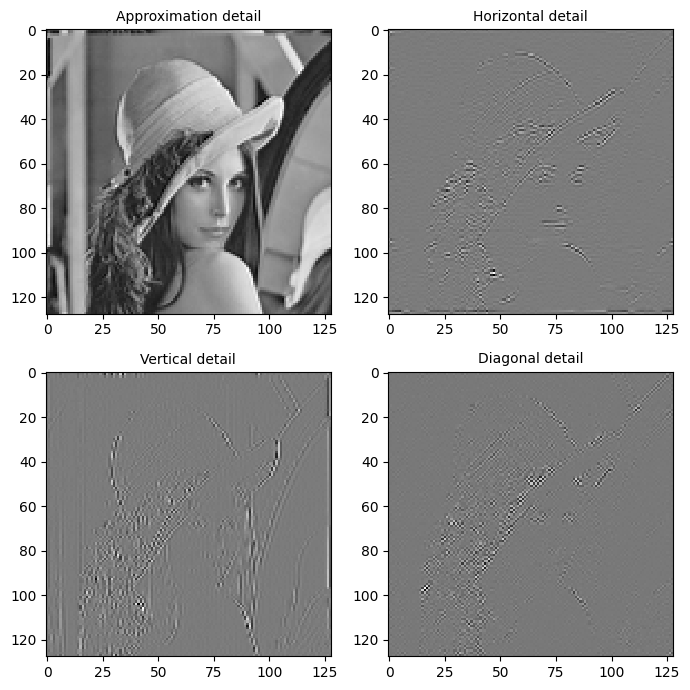

In [69]:
# Applying 2 level Digital Wavelet Transform to the attacked image and plotting approximation and details
print("Shape of the attacked image is :", median_blur_image.shape)
coefficients= pywt.wavedec2(data= median_blur_image, wavelet= "db5", mode= "periodization", level= 2, axes= (-2, -1))
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)= coefficients
print("Shapes of 1st level DWT coefficients are :", cH1.shape, cV1.shape, cD1.shape)
print("Shapes of 2nd level DWT coefficients are :", cA2.shape, cH2.shape, cV2.shape, cD2.shape)
plt.figure(figsize= (7, 7))
plt.subplot(2, 2, 1)
plt.imshow(X= cA2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Approximation detail", fontsize= 10)

plt.subplot(2, 2, 2)
plt.imshow(X= cH2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Horizontal detail", fontsize= 10)

plt.subplot(2, 2, 3)
plt.imshow(X= cV2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Vertical detail", fontsize= 10)

plt.subplot(2, 2, 4)
plt.imshow(X= cD2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Diagonal detail", fontsize= 10)
plt.tight_layout()
plt.show()

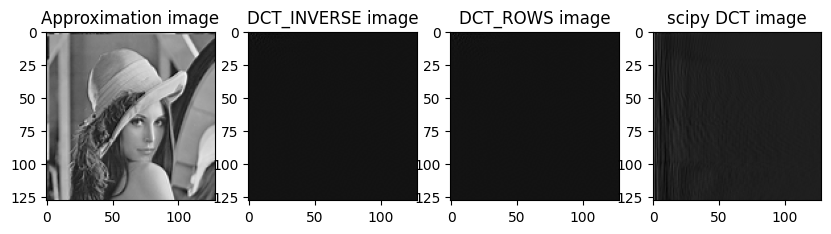

In [70]:
# Applying DCT on approximation sub- band
plt.figure(figsize= (10, 5))
plt.subplot(1, 4, 1)
plt.imshow(X= cA2, cmap= plt.cm.gray)
plt.title("Approximation image")
imf = numpy.float32(cA2) # float conversion
dst = cv2.dct(imf, cv2.DCT_INVERSE)
plt.subplot(1, 4, 2)
plt.imshow(X= dst, cmap= plt.cm.gray)
plt.title("DCT_INVERSE image")
dct = cv2.dct(imf, cv2.DCT_ROWS)
plt.subplot(1, 4, 3)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("DCT_ROWS image")
dct= scipy.fft.dct(x= cA2, type= 2, n= None)
plt.subplot(1, 4, 4)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("scipy DCT image")
plt.show()

In [71]:
dct_image= scipy.fft.dct(x= cA2, type= 2, n= None)
# dct_image= dct_image.astype(dtype= int)
print(dct_image.shape)

(128, 128)


In [72]:
# for i in range(len(dct_image)):
#     for j in range(len(dct_image[i])):
#         dct_image[i][j]= round(dct_image[i][j])
# print(dct_image.shape)

In [73]:
dct_image_2= dct_image.reshape((128* 128))
print(dct_image_2.shape)
dct_image_2

(16384,)


array([ 1.1875322e+05, -7.5535850e+03, -6.9454741e+03, ...,
       -2.1388965e+02, -6.8008398e+02, -6.5615234e+00], dtype=float32)

In [74]:
watermark_image_list= []
for i in range(len(extraction_indexes_list)):
    if dct_image_2[extraction_indexes_list[i]] < 0:
        watermark_image_list.append(1)
    elif dct_image_2[extraction_indexes_list[i]] >= 0:
        watermark_image_list.append(0)
watermark_image_new= numpy.array(watermark_image_list).reshape((32, 32))
watermark_image_new.shape

(32, 32)

In [75]:
# Comparing original watermark and new watermark image
nc_score= calculate_nc_score(original_watermark_image, watermark_image_new)
print("Normalized correlation score is :", nc_score)
calculate_mse_psnr(original_watermark_image, watermark_image_new, max_pixel= 1)

Normalized correlation score is : 0.98
Mean squared error is : 0.0117 and PSNR score is : 19.3112


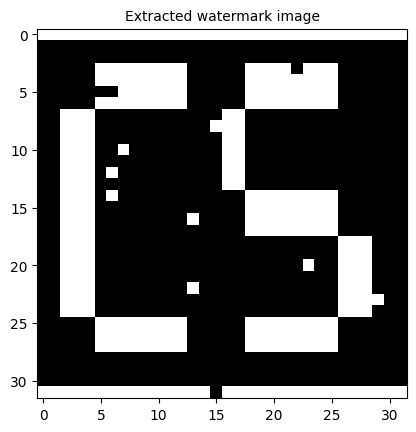

In [76]:
plt.imshow(X= watermark_image_new, cmap= plt.cm.gray)
plt.title(label= "Extracted watermark image", fontsize= 10)
plt.show()

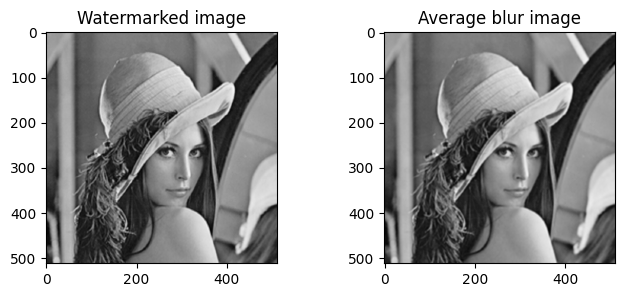

In [77]:
# Applying attacks on watermarked image
# 4. Average filter
attacked_image= watermarked_image.copy()
plt.figure(figsize= (8, 3))
plt.subplot(1, 2, 1)
plt.title("Watermarked image")
plt.imshow(X= attacked_image, cmap= plt.cm.gray)
average_blur_image = cv2.blur(src= attacked_image, ksize= (3, 3))
plt.subplot(1, 2, 2)
plt.title("Average blur image")
plt.imshow(average_blur_image, cmap= plt.cm.gray)
plt.show()

In [78]:
calculate_mse_psnr(original_image, average_blur_image, max_pixel= 255)

Mean squared error is : 6.1825 and PSNR score is : 40.2192


Shape of the attacked image is : (512, 512)
Shapes of 1st level DWT coefficients are : (256, 256) (256, 256) (256, 256)
Shapes of 2nd level DWT coefficients are : (128, 128) (128, 128) (128, 128) (128, 128)


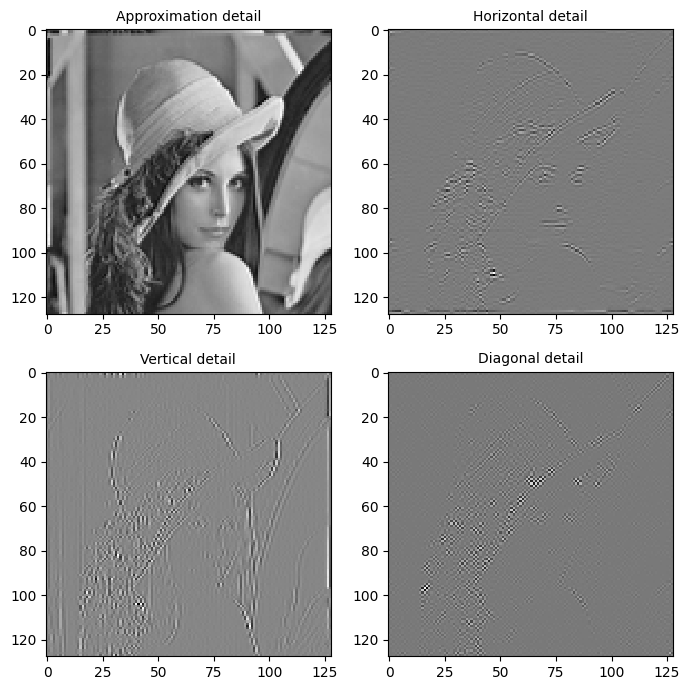

In [79]:
# Applying 2 level Digital Wavelet Transform to the attacked image and plotting approximation and details
print("Shape of the attacked image is :", average_blur_image.shape)
coefficients= pywt.wavedec2(data= average_blur_image, wavelet= "db5", mode= "periodization", level= 2, axes= (-2, -1))
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)= coefficients
print("Shapes of 1st level DWT coefficients are :", cH1.shape, cV1.shape, cD1.shape)
print("Shapes of 2nd level DWT coefficients are :", cA2.shape, cH2.shape, cV2.shape, cD2.shape)
plt.figure(figsize= (7, 7))
plt.subplot(2, 2, 1)
plt.imshow(X= cA2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Approximation detail", fontsize= 10)

plt.subplot(2, 2, 2)
plt.imshow(X= cH2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Horizontal detail", fontsize= 10)

plt.subplot(2, 2, 3)
plt.imshow(X= cV2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Vertical detail", fontsize= 10)

plt.subplot(2, 2, 4)
plt.imshow(X= cD2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Diagonal detail", fontsize= 10)
plt.tight_layout()
plt.show()

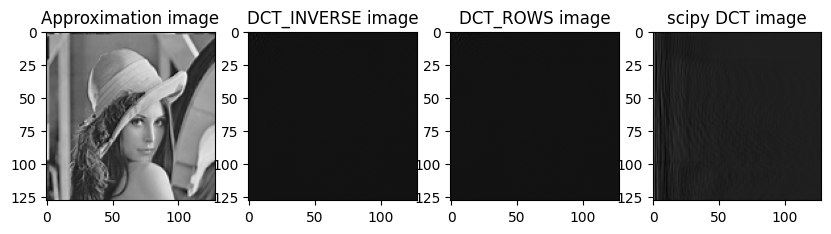

In [80]:
# Applying DCT on approximation sub- band
plt.figure(figsize= (10, 5))
plt.subplot(1, 4, 1)
plt.imshow(X= cA2, cmap= plt.cm.gray)
plt.title("Approximation image")
imf = numpy.float32(cA2) # float conversion
dst = cv2.dct(imf, cv2.DCT_INVERSE)
plt.subplot(1, 4, 2)
plt.imshow(X= dst, cmap= plt.cm.gray)
plt.title("DCT_INVERSE image")
dct = cv2.dct(imf, cv2.DCT_ROWS)
plt.subplot(1, 4, 3)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("DCT_ROWS image")
dct= scipy.fft.dct(x= cA2, type= 2, n= None)
plt.subplot(1, 4, 4)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("scipy DCT image")
plt.show()

In [81]:
dct_image= scipy.fft.dct(x= cA2, type= 2, n= None)
# dct_image= dct_image.astype(dtype= int)
print(dct_image.shape)

(128, 128)


In [82]:
# for i in range(len(dct_image)):
#     for j in range(len(dct_image[i])):
#         dct_image[i][j]= round(dct_image[i][j])
# print(dct_image.shape)

In [83]:
dct_image_2= dct_image.reshape((128* 128))
print(dct_image_2.shape)
dct_image_2

(16384,)


array([ 1.1878539e+05, -7.5274775e+03, -6.9579619e+03, ...,
       -1.9627930e+02, -5.6747998e+02,  4.5463867e+00], dtype=float32)

In [84]:
watermark_image_list= []
for i in range(len(extraction_indexes_list)):
    if dct_image_2[extraction_indexes_list[i]] < 0:
        watermark_image_list.append(1)
    elif dct_image_2[extraction_indexes_list[i]] >= 0:
        watermark_image_list.append(0)
watermark_image_new= numpy.array(watermark_image_list).reshape((32, 32))
watermark_image_new.shape

(32, 32)

In [85]:
# Comparing original watermark and new watermark image
nc_score= calculate_nc_score(original_watermark_image, watermark_image_new)
print("Normalized correlation score is :", nc_score)
calculate_mse_psnr(original_watermark_image, watermark_image_new, max_pixel= 1)

Normalized correlation score is : 0.9546
Mean squared error is : 0.0264 and PSNR score is : 15.7894


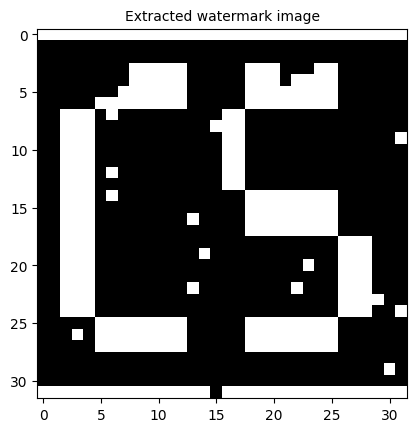

In [86]:
plt.imshow(X= watermark_image_new, cmap= plt.cm.gray)
plt.title(label= "Extracted watermark image", fontsize= 10)
plt.show()

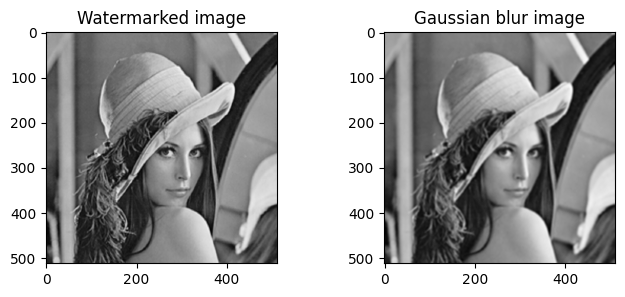

In [87]:
# Applying attacks on watermarked image
# 5. Gaussian filter
attacked_image= watermarked_image.copy()
plt.figure(figsize= (8, 3))
plt.subplot(1, 2, 1)
plt.title("Watermarked image")
plt.imshow(X= attacked_image, cmap= plt.cm.gray)
gaussian_blur_image = cv2.GaussianBlur(src= attacked_image, ksize= (5, 5), sigmaX= cv2.BORDER_DEFAULT)
plt.subplot(1, 2, 2)
plt.title("Gaussian blur image")
plt.imshow(gaussian_blur_image, cmap= plt.cm.gray)
plt.show()

In [88]:
calculate_mse_psnr(original_image, gaussian_blur_image, max_pixel= 255)

Mean squared error is : 28.0396 and PSNR score is : 33.6531


Shape of the attacked image is : (512, 512)
Shapes of 1st level DWT coefficients are : (256, 256) (256, 256) (256, 256)
Shapes of 2nd level DWT coefficients are : (128, 128) (128, 128) (128, 128) (128, 128)


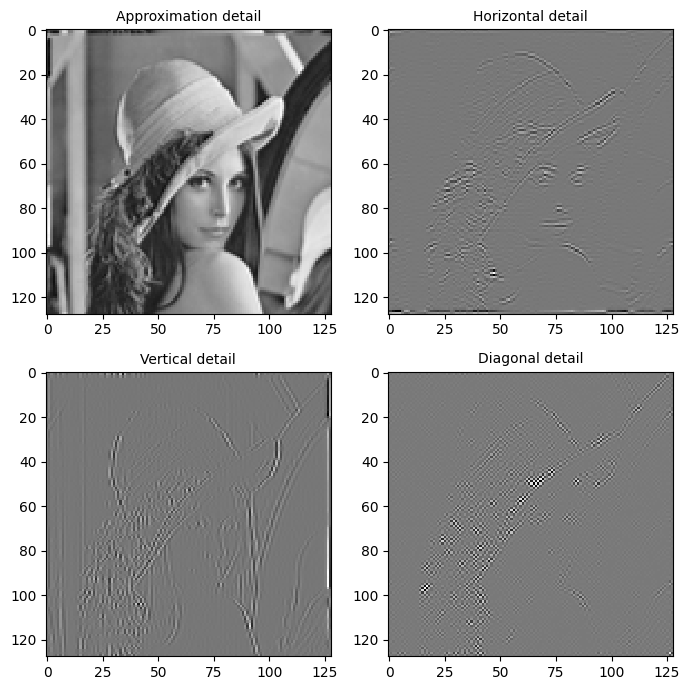

In [89]:
# Applying 2 level Digital Wavelet Transform to the attacked image and plotting approximation and details
print("Shape of the attacked image is :", gaussian_blur_image.shape)
coefficients= pywt.wavedec2(data= gaussian_blur_image, wavelet= "db5", mode= "periodization", level= 2, axes= (-2, -1))
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)= coefficients
print("Shapes of 1st level DWT coefficients are :", cH1.shape, cV1.shape, cD1.shape)
print("Shapes of 2nd level DWT coefficients are :", cA2.shape, cH2.shape, cV2.shape, cD2.shape)
plt.figure(figsize= (7, 7))
plt.subplot(2, 2, 1)
plt.imshow(X= cA2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Approximation detail", fontsize= 10)

plt.subplot(2, 2, 2)
plt.imshow(X= cH2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Horizontal detail", fontsize= 10)

plt.subplot(2, 2, 3)
plt.imshow(X= cV2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Vertical detail", fontsize= 10)

plt.subplot(2, 2, 4)
plt.imshow(X= cD2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Diagonal detail", fontsize= 10)
plt.tight_layout()
plt.show()

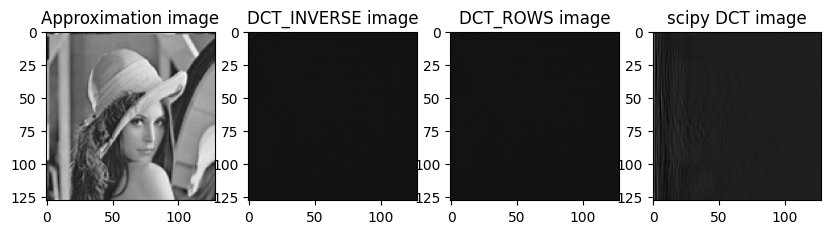

In [90]:
# Applying DCT on approximation sub- band
plt.figure(figsize= (10, 5))
plt.subplot(1, 4, 1)
plt.imshow(X= cA2, cmap= plt.cm.gray)
plt.title("Approximation image")
imf = numpy.float32(cA2) # float conversion
dst = cv2.dct(imf, cv2.DCT_INVERSE)
plt.subplot(1, 4, 2)
plt.imshow(X= dst, cmap= plt.cm.gray)
plt.title("DCT_INVERSE image")
dct = cv2.dct(imf, cv2.DCT_ROWS)
plt.subplot(1, 4, 3)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("DCT_ROWS image")
dct= scipy.fft.dct(x= cA2, type= 2, n= None)
plt.subplot(1, 4, 4)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("scipy DCT image")
plt.show()

In [91]:
dct_image= scipy.fft.dct(x= cA2, type= 2, n= None)
# dct_image= dct_image.astype(dtype= int)
print(dct_image.shape)

(128, 128)


In [92]:
# for i in range(len(dct_image)):
#     for j in range(len(dct_image[i])):
#         dct_image[i][j]= round(dct_image[i][j])
# print(dct_image.shape)

In [93]:
dct_image_2= dct_image.reshape((128* 128))
print(dct_image_2.shape)
dct_image_2

(16384,)


array([ 1.1870594e+05, -7.5485615e+03, -6.9948096e+03, ...,
       -1.3299414e+02, -3.4680542e+02,  2.6552734e+00], dtype=float32)

In [94]:
watermark_image_list= []
for i in range(len(extraction_indexes_list)):
    if dct_image_2[extraction_indexes_list[i]] < 0:
        watermark_image_list.append(1)
    elif dct_image_2[extraction_indexes_list[i]] >= 0:
        watermark_image_list.append(0)
watermark_image_new= numpy.array(watermark_image_list).reshape((32, 32))
watermark_image_new.shape

(32, 32)

In [95]:
# Comparing original watermark and new watermark image
nc_score= calculate_nc_score(original_watermark_image, watermark_image_new)
print("Normalized correlation score is :", nc_score)
calculate_mse_psnr(original_watermark_image, watermark_image_new, max_pixel= 1)

Normalized correlation score is : 0.893
Mean squared error is : 0.0664 and PSNR score is : 11.7779


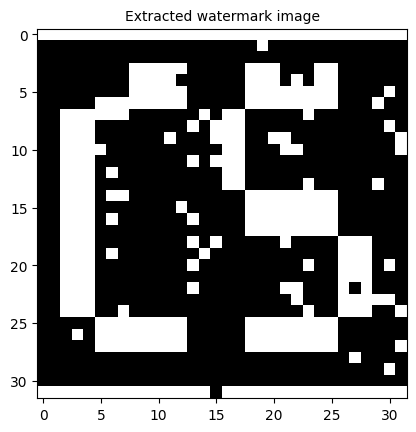

In [96]:
plt.imshow(X= watermark_image_new, cmap= plt.cm.gray)
plt.title(label= "Extracted watermark image", fontsize= 10)
plt.show()

(17985,) (512, 512, 3) (512, 512)


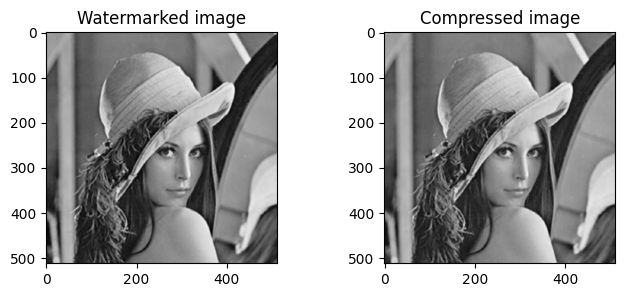

In [97]:
# Applying attacks on watermarked image
# 6. JPEG Compression
attacked_image= watermarked_image.copy()
encode_parameters= [int(cv2.IMWRITE_JPEG_QUALITY), 50]     # Encode the image with JPEG compression  # compressing the image by 50 %
_, encoded_image= cv2.imencode(ext= ".jpg", img= attacked_image, params= encode_parameters)
decoded_image= cv2.imdecode(buf= encoded_image, flags= cv2.IMREAD_COLOR)
compressed_image= cv2.cvtColor(src= decoded_image, code= cv2.COLOR_BGR2GRAY)
print(encoded_image.shape, decoded_image.shape, compressed_image.shape)
plt.figure(figsize= (8, 3))
plt.subplot(1, 2, 1)
plt.title("Watermarked image")
plt.imshow(X= attacked_image, cmap= plt.cm.gray)
plt.subplot(1, 2, 2)
plt.title("Compressed image")
plt.imshow(compressed_image, cmap= plt.cm.gray)
plt.show()

In [98]:
calculate_mse_psnr(original_image, compressed_image, max_pixel= 255)

Mean squared error is : 5.4102 and PSNR score is : 40.7987


Shape of the attacked image is : (512, 512)
Shapes of 1st level DWT coefficients are : (256, 256) (256, 256) (256, 256)
Shapes of 2nd level DWT coefficients are : (128, 128) (128, 128) (128, 128) (128, 128)


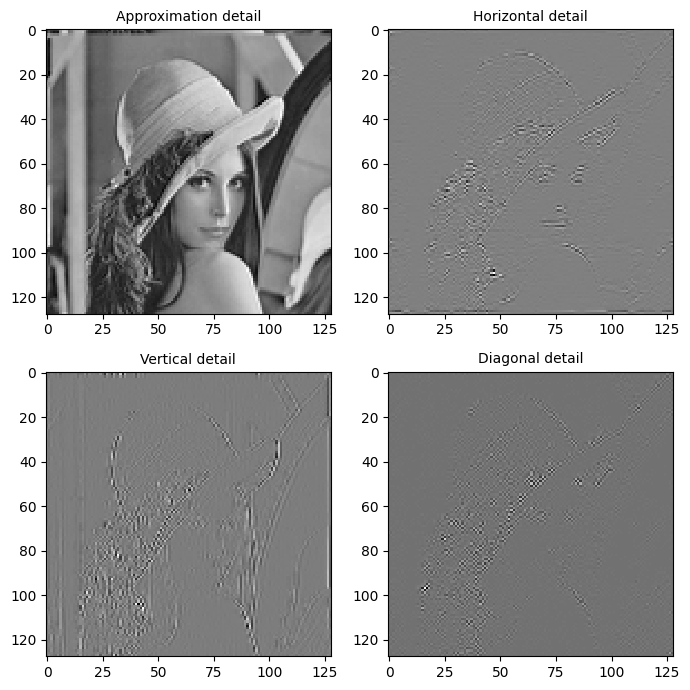

In [99]:
# Applying 2 level Digital Wavelet Transform to the attacked image and plotting approximation and details
print("Shape of the attacked image is :", compressed_image.shape)
coefficients= pywt.wavedec2(data= compressed_image, wavelet= "db5", mode= "periodization", level= 2, axes= (-2, -1))
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)= coefficients
print("Shapes of 1st level DWT coefficients are :", cH1.shape, cV1.shape, cD1.shape)
print("Shapes of 2nd level DWT coefficients are :", cA2.shape, cH2.shape, cV2.shape, cD2.shape)
plt.figure(figsize= (7, 7))
plt.subplot(2, 2, 1)
plt.imshow(X= cA2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Approximation detail", fontsize= 10)

plt.subplot(2, 2, 2)
plt.imshow(X= cH2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Horizontal detail", fontsize= 10)

plt.subplot(2, 2, 3)
plt.imshow(X= cV2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Vertical detail", fontsize= 10)

plt.subplot(2, 2, 4)
plt.imshow(X= cD2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Diagonal detail", fontsize= 10)
plt.tight_layout()
plt.show()

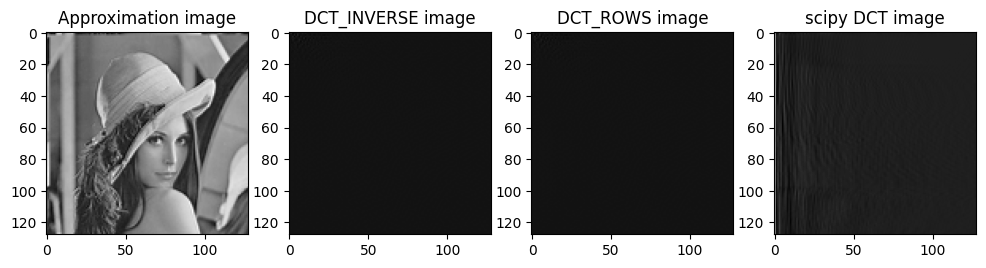

In [100]:
# Applying DCT on approximation sub- band
plt.figure(figsize= (12, 5))
plt.subplot(1, 4, 1)
plt.imshow(X= cA2, cmap= plt.cm.gray)
plt.title("Approximation image")
imf = numpy.float32(cA2) # float conversion
dst = cv2.dct(imf, cv2.DCT_INVERSE)
plt.subplot(1, 4, 2)
plt.imshow(X= dst, cmap= plt.cm.gray)
plt.title("DCT_INVERSE image")
dct = cv2.dct(imf, cv2.DCT_ROWS)
plt.subplot(1, 4, 3)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("DCT_ROWS image")
dct= scipy.fft.dct(x= cA2, type= 2, n= None)
plt.subplot(1, 4, 4)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("scipy DCT image")
plt.show()

In [101]:
dct_image= scipy.fft.dct(x= cA2, type= 2, n= None)
# dct_image= dct_image.astype(dtype= int)
print(dct_image.shape)

(128, 128)


In [102]:
# for i in range(len(dct_image)):
#     for j in range(len(dct_image[i])):
#         dct_image[i][j]= round(dct_image[i][j])
# print(dct_image.shape)

In [103]:
dct_image_2= dct_image.reshape((128* 128))
print(dct_image_2.shape)
dct_image_2

(16384,)


array([ 1.18765332e+05, -7.39924174e+03, -6.94894354e+03, ...,
       -2.68921696e+02, -7.44637448e+02, -7.82669213e+00])

In [104]:
watermark_image_list= []
for i in range(len(extraction_indexes_list)):
    if dct_image_2[extraction_indexes_list[i]] < 0:
        watermark_image_list.append(1)
    elif dct_image_2[extraction_indexes_list[i]] >= 0:
        watermark_image_list.append(0)
watermark_image_new= numpy.array(watermark_image_list).reshape((32, 32))
watermark_image_new.shape

(32, 32)

In [105]:
# Comparing original watermark and new watermark image
nc_score= calculate_nc_score(original_watermark_image, watermark_image_new)
print("Normalized correlation score is :", nc_score)
calculate_mse_psnr(original_watermark_image, watermark_image_new, max_pixel= 1)

Normalized correlation score is : 0.9732
Mean squared error is : 0.0156 and PSNR score is : 18.0618


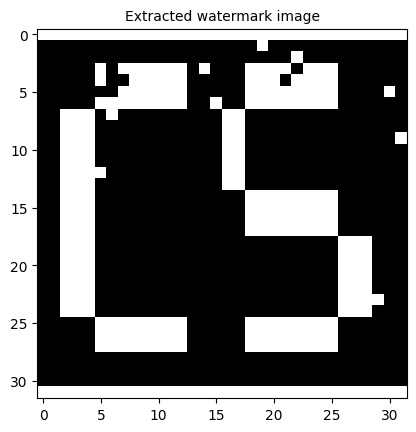

In [106]:
plt.imshow(X= watermark_image_new, cmap= plt.cm.gray)
plt.title(label= "Extracted watermark image", fontsize= 10)
plt.show()

In [107]:
random.randint(a= 300, b= 500)

396

In [108]:
def add_salt_and_pepper_noise(img):
    (row , col)= img.shape  # Getting the dimensions of the image
    number_of_pixels= random.randint(a= 300, b= 5000)  	# Randomly pick some pixels in the image for coloring them white. Pick a random number between 300 and 10000
    for i in range(number_of_pixels):
        y_coord= random.randint(a= 0, b= (row - 1))         # Pick a random y coordinate
        x_coord= random.randint(a= 0, b= (col - 1))   # Pick a random x coordinate
        img[y_coord][x_coord]= 255    # Coloring that pixel to white
    number_of_pixels= random.randint(300 , 5000)    # Randomly pick some pixels in the image for coloring them black. Pick a random number between 300 and 10000
    for i in range(number_of_pixels):
        y_coord= random.randint(a= 0, b= (row - 1))  # Pick a random y coordinate
        x_coord= random.randint(a= 0, b= (col - 1))  # Pick a random x coordinate
        img[y_coord][x_coord]= 0  # Color that pixel to black
    return img

In [109]:
# Applying attacks on watermarked image
# 7. Salt & Pepper noise        # Salt-and-pepper noise can be applied only to grayscale images.
attacked_image= watermarked_image.copy()
salt_pepper_noise_image= add_salt_and_pepper_noise(attacked_image)

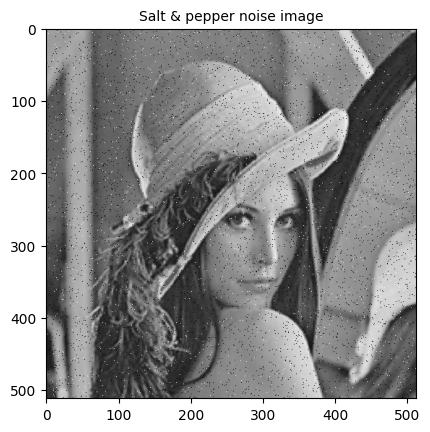

In [110]:
plt.imshow(X= salt_pepper_noise_image, cmap= plt.cm.gray)
plt.title(label= "Salt & pepper noise image", fontsize= 10)
plt.show()

In [111]:
calculate_mse_psnr(original_image, salt_pepper_noise_image, max_pixel= 255)

Mean squared error is : 422.6218 and PSNR score is : 21.8713


Shape of the attacked image is : (512, 512)
Shapes of 1st level DWT coefficients are : (256, 256) (256, 256) (256, 256)
Shapes of 2nd level DWT coefficients are : (128, 128) (128, 128) (128, 128) (128, 128)


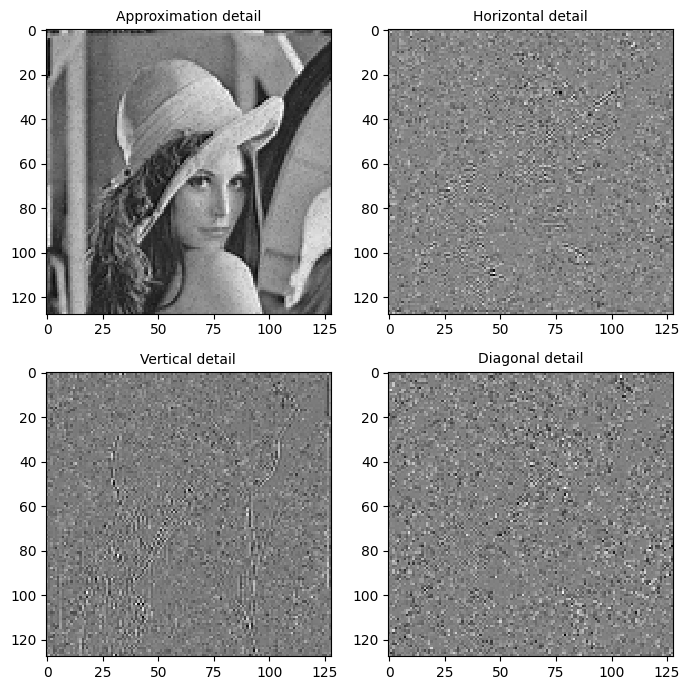

In [112]:
# Applying 2 level Digital Wavelet Transform to the attacked image and plotting approximation and details
print("Shape of the attacked image is :", salt_pepper_noise_image.shape)
coefficients= pywt.wavedec2(data= salt_pepper_noise_image, wavelet= "db5", mode= "periodization", level= 2, axes= (-2, -1))
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)= coefficients
print("Shapes of 1st level DWT coefficients are :", cH1.shape, cV1.shape, cD1.shape)
print("Shapes of 2nd level DWT coefficients are :", cA2.shape, cH2.shape, cV2.shape, cD2.shape)
plt.figure(figsize= (7, 7))
plt.subplot(2, 2, 1)
plt.imshow(X= cA2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Approximation detail", fontsize= 10)

plt.subplot(2, 2, 2)
plt.imshow(X= cH2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Horizontal detail", fontsize= 10)

plt.subplot(2, 2, 3)
plt.imshow(X= cV2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Vertical detail", fontsize= 10)

plt.subplot(2, 2, 4)
plt.imshow(X= cD2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Diagonal detail", fontsize= 10)
plt.tight_layout()
plt.show()

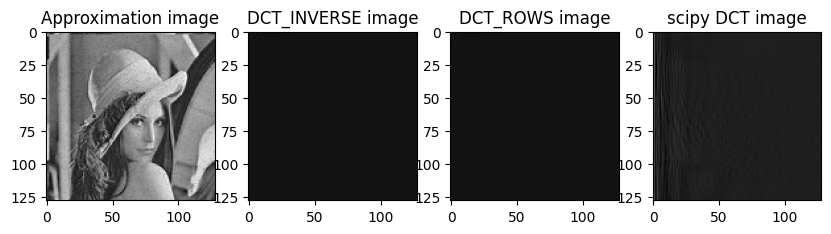

In [113]:
# Applying DCT on approximation sub- band
plt.figure(figsize= (10, 5))
plt.subplot(1, 4, 1)
plt.imshow(X= cA2, cmap= plt.cm.gray)
plt.title("Approximation image")
imf = numpy.float32(cA2) # float conversion
dst = cv2.dct(imf, cv2.DCT_INVERSE)
plt.subplot(1, 4, 2)
plt.imshow(X= dst, cmap= plt.cm.gray)
plt.title("DCT_INVERSE image")
dct = cv2.dct(imf, cv2.DCT_ROWS)
plt.subplot(1, 4, 3)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("DCT_ROWS image")
dct= scipy.fft.dct(x= cA2, type= 2, n= None)
plt.subplot(1, 4, 4)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("scipy DCT image")
plt.show()

In [114]:
dct_image= scipy.fft.dct(x= cA2, type= 2, n= None)
# dct_image= dct_image.astype(dtype= int)
print(dct_image.shape)

(128, 128)


In [115]:
dct_image_2= dct_image.reshape((128* 128))
print(dct_image_2.shape)
dct_image_2

(16384,)


array([118122.91    ,  -6778.491   ,  -6211.078   , ...,   -127.711914,
         -376.688   ,   -560.5884  ], dtype=float32)

In [116]:
watermark_image_list= []
for i in range(len(extraction_indexes_list)):
    if dct_image_2[extraction_indexes_list[i]] < 0:
        watermark_image_list.append(1)
    elif dct_image_2[extraction_indexes_list[i]] >= 0:
        watermark_image_list.append(0)
watermark_image_new= numpy.array(watermark_image_list).reshape((32, 32))
print(watermark_image_new.shape)

(32, 32)


In [117]:
# Comparing original watermark and new watermark image
nc_score= calculate_nc_score(original_watermark_image, watermark_image_new)
print("Normalized correlation score is :", nc_score)
calculate_mse_psnr(original_watermark_image, watermark_image_new, max_pixel= 1)

Normalized correlation score is : 0.8622
Mean squared error is : 0.0879 and PSNR score is : 10.5606


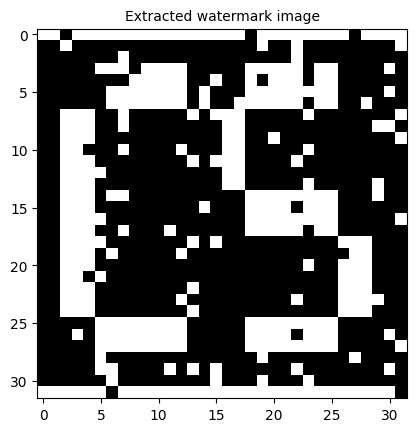

In [118]:
plt.imshow(X= watermark_image_new, cmap= plt.cm.gray)
plt.title(label= "Extracted watermark image", fontsize= 10)
plt.show()

In [119]:
# Applying attacks on watermarked image
# 8. Rotation
attacked_image= watermarked_image.copy()
(height, width)= attacked_image.shape[0 : 2]
center= (width/2, height/2)   # Compute the center of the image
rotation_matrix= cv2.getRotationMatrix2D(center= center, angle= 45, scale= 1)   # Calculate rotation matrix
rotated_image= cv2.warpAffine(src= attacked_image, M= rotation_matrix, dsize= (width, height))  # Apply the computed rotation matrix to the image
rotated_image.shape

(512, 512)

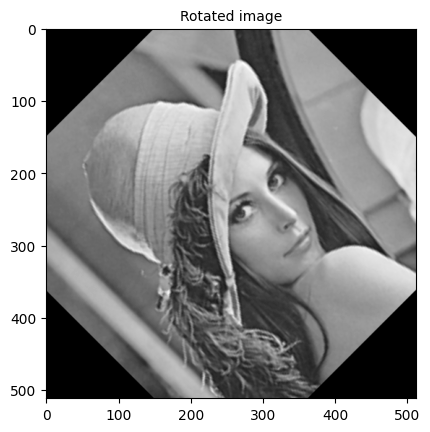

In [120]:
plt.imshow(X= rotated_image, cmap= plt.cm.gray)
plt.title(label= "Rotated image", fontsize= 10)
plt.show()

In [121]:
calculate_mse_psnr(original_image, rotated_image, max_pixel= 255)

Mean squared error is : 5780.5874 and PSNR score is : 10.5111


(512, 512)


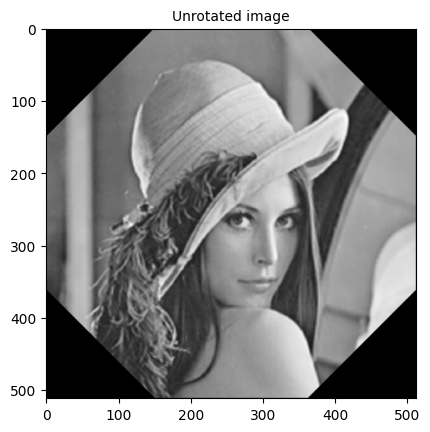

In [122]:
# Reversing image rotation attack
(height, width)= rotated_image.shape[0 : 2]
center= (width/2, height/2)   # Compute the center of the image
rotation_matrix= cv2.getRotationMatrix2D(center= center, angle= -45, scale= 1)   # Calculate rotation matrix
unrotated_image= cv2.warpAffine(src= rotated_image, M= rotation_matrix, dsize= (width, height))  # Apply the computed rotation matrix to the image
print(unrotated_image.shape)
plt.imshow(X= unrotated_image, cmap= plt.cm.gray)
plt.title(label= "Unrotated image", fontsize= 10)
plt.show()

Shape of the attacked image is : (512, 512)
Shapes of 1st level DWT coefficients are : (256, 256) (256, 256) (256, 256)
Shapes of 2nd level DWT coefficients are : (128, 128) (128, 128) (128, 128) (128, 128)


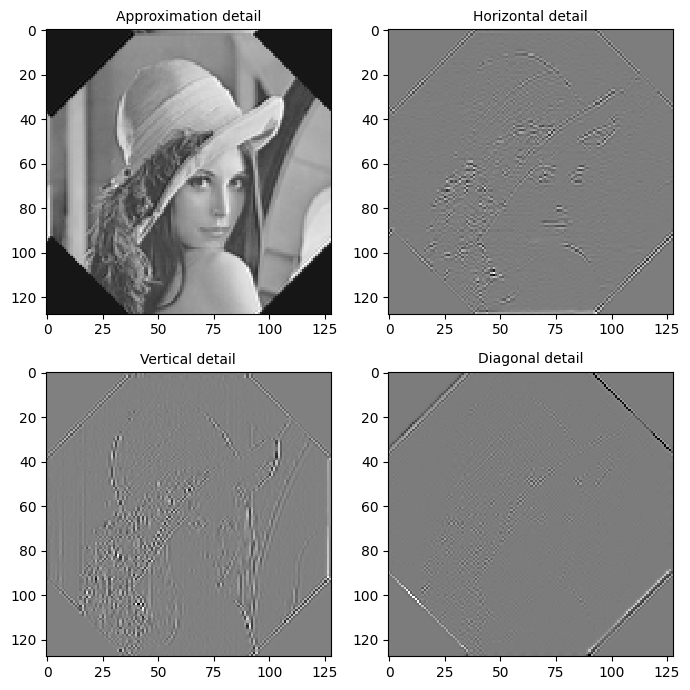

In [123]:
# Applying 2 level Digital Wavelet Transform to the attacked image and plotting approximation and details
print("Shape of the attacked image is :", unrotated_image.shape)
coefficients= pywt.wavedec2(data= unrotated_image, wavelet= "db5", mode= "periodization", level= 2, axes= (-2, -1))
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)= coefficients
print("Shapes of 1st level DWT coefficients are :", cH1.shape, cV1.shape, cD1.shape)
print("Shapes of 2nd level DWT coefficients are :", cA2.shape, cH2.shape, cV2.shape, cD2.shape)
plt.figure(figsize= (7, 7))
plt.subplot(2, 2, 1)
plt.imshow(X= cA2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Approximation detail", fontsize= 10)

plt.subplot(2, 2, 2)
plt.imshow(X= cH2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Horizontal detail", fontsize= 10)

plt.subplot(2, 2, 3)
plt.imshow(X= cV2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Vertical detail", fontsize= 10)

plt.subplot(2, 2, 4)
plt.imshow(X= cD2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Diagonal detail", fontsize= 10)
plt.tight_layout()
plt.show()

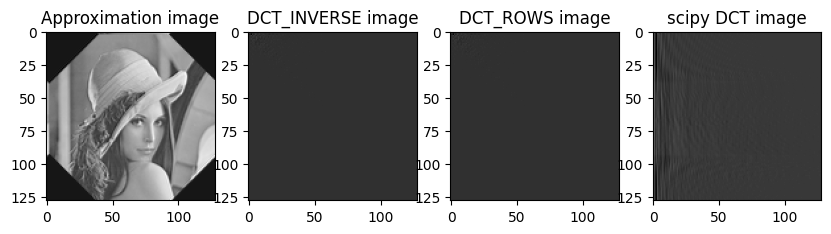

In [124]:
# Applying DCT on approximation sub- band
plt.figure(figsize= (10, 5))
plt.subplot(1, 4, 1)
plt.imshow(X= cA2, cmap= plt.cm.gray)
plt.title("Approximation image")
imf = numpy.float32(cA2) # float conversion
dst = cv2.dct(imf, cv2.DCT_INVERSE)
plt.subplot(1, 4, 2)
plt.imshow(X= dst, cmap= plt.cm.gray)
plt.title("DCT_INVERSE image")
dct = cv2.dct(imf, cv2.DCT_ROWS)
plt.subplot(1, 4, 3)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("DCT_ROWS image")
dct= scipy.fft.dct(x= cA2, type= 2, n= None)
plt.subplot(1, 4, 4)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("scipy DCT image")
plt.show()

In [125]:
dct_image= scipy.fft.dct(x= cA2, type= 2, n= None)
# dct_image= dct_image.astype(dtype= int)
print(dct_image.shape)

(128, 128)


In [126]:
dct_image_2= dct_image.reshape((128* 128))
print(dct_image_2.shape)
dct_image_2

(16384,)


array([ 59807.08   ,  -9576.654  , -40823.36   , ...,   -155.23242,
         -326.38086,   -208.46191], dtype=float32)

In [127]:
watermark_image_list= []
for i in range(len(extraction_indexes_list)):
    if dct_image_2[extraction_indexes_list[i]] < 0:
        watermark_image_list.append(1)
    elif dct_image_2[extraction_indexes_list[i]] >= 0:
        watermark_image_list.append(0)
watermark_image_new= numpy.array(watermark_image_list).reshape((32, 32))
print(watermark_image_new.shape)

(32, 32)


In [128]:
# Comparing original watermark and new watermark image
nc_score= calculate_nc_score(original_watermark_image, watermark_image_new)
print("Normalized correlation score is :", nc_score)
calculate_mse_psnr(original_watermark_image, watermark_image_new, max_pixel= 1)

Normalized correlation score is : 0.733
Mean squared error is : 0.1709 and PSNR score is : 7.6726


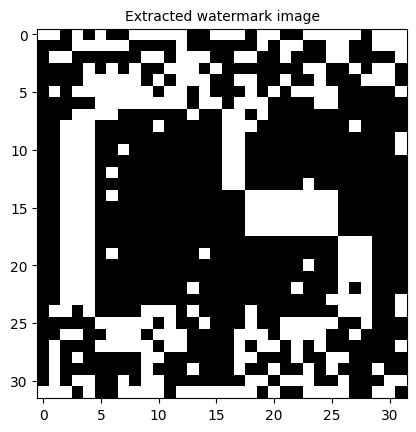

In [129]:
plt.imshow(X= watermark_image_new, cmap= plt.cm.gray)
plt.title(label= "Extracted watermark image", fontsize= 10)
plt.show()

In [130]:
# Applying attacks on watermarked image
# 9. Cropping
attacked_image= watermarked_image.copy()
x= 50
ones_array= numpy.ones(shape= (x, 512))
cropped_image_= numpy.append(ones_array, attacked_image[x : (512- x), 0 : ])
cropped_image= numpy.append(cropped_image_, ones_array)
cropped_image= cropped_image.reshape((512, 512))
cropped_image.shape

(512, 512)

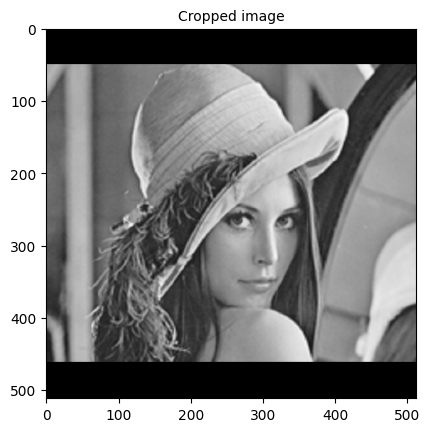

In [131]:
plt.imshow(X= cropped_image, cmap= plt.cm.gray)
plt.title(label= "Cropped image", fontsize= 10)
plt.show()

In [132]:
calculate_mse_psnr(original_image, cropped_image, max_pixel= 255)

Mean squared error is : 3168.7704 and PSNR score is : 13.1219


Shape of the attacked image is : (512, 512)
Shapes of 1st level DWT coefficients are : (256, 256) (256, 256) (256, 256)
Shapes of 2nd level DWT coefficients are : (128, 128) (128, 128) (128, 128) (128, 128)


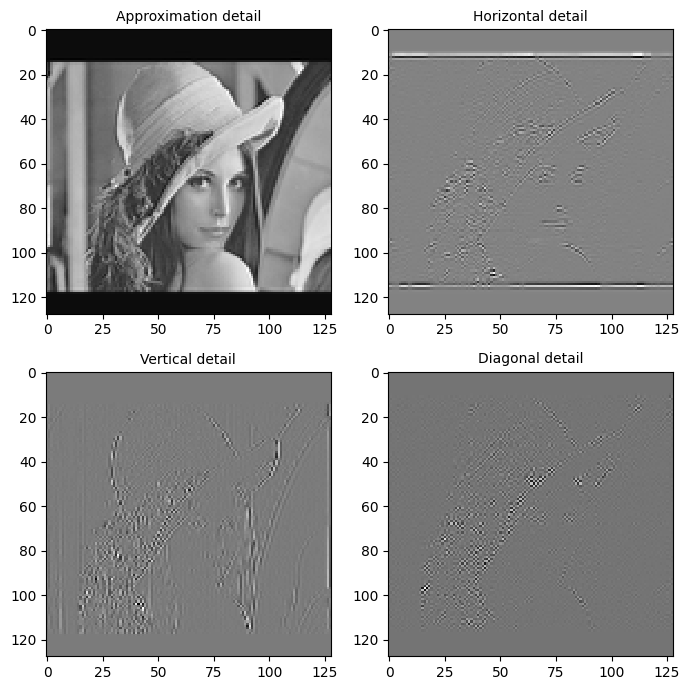

In [133]:
# Applying 2 level Digital Wavelet Transform to the attacked image and plotting approximation and details
print("Shape of the attacked image is :", cropped_image.shape)
coefficients= pywt.wavedec2(data= cropped_image, wavelet= "db5", mode= "periodization", level= 2, axes= (-2, -1))
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)= coefficients
print("Shapes of 1st level DWT coefficients are :", cH1.shape, cV1.shape, cD1.shape)
print("Shapes of 2nd level DWT coefficients are :", cA2.shape, cH2.shape, cV2.shape, cD2.shape)
plt.figure(figsize= (7, 7))
plt.subplot(2, 2, 1)
plt.imshow(X= cA2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Approximation detail", fontsize= 10)

plt.subplot(2, 2, 2)
plt.imshow(X= cH2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Horizontal detail", fontsize= 10)

plt.subplot(2, 2, 3)
plt.imshow(X= cV2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Vertical detail", fontsize= 10)

plt.subplot(2, 2, 4)
plt.imshow(X= cD2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Diagonal detail", fontsize= 10)
plt.tight_layout()
plt.show()

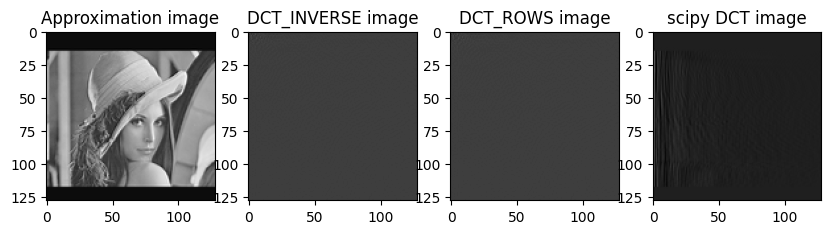

In [134]:
# Applying DCT on approximation sub- band
plt.figure(figsize= (10, 5))
plt.subplot(1, 4, 1)
plt.imshow(X= cA2, cmap= plt.cm.gray)
plt.title("Approximation image")
imf = numpy.float32(cA2) # float conversion
dst = cv2.dct(imf, cv2.DCT_INVERSE)
plt.subplot(1, 4, 2)
plt.imshow(X= dst, cmap= plt.cm.gray)
plt.title("DCT_INVERSE image")
dct = cv2.dct(imf, cv2.DCT_ROWS)
plt.subplot(1, 4, 3)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("DCT_ROWS image")
dct= scipy.fft.dct(x= cA2, type= 2, n= None)
plt.subplot(1, 4, 4)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("scipy DCT image")
plt.show()

In [135]:
dct_image= scipy.fft.dct(x= cA2, type= 2, n= None)
# dct_image= dct_image.astype(dtype= int)
print(dct_image.shape)

(128, 128)


In [136]:
dct_image_2= dct_image.reshape((128* 128))
print(dct_image_2.shape)
dct_image_2

(16384,)


array([1024.,    0.,    0., ...,    0.,    0.,    0.])

In [137]:
watermark_image_list= []
for i in range(len(extraction_indexes_list)):
    if dct_image_2[extraction_indexes_list[i]] < 0:
        watermark_image_list.append(1)
    elif dct_image_2[extraction_indexes_list[i]] >= 0:
        watermark_image_list.append(0)
watermark_image_new= numpy.array(watermark_image_list).reshape((32, 32))
print(watermark_image_new.shape)

(32, 32)


In [138]:
# Comparing original watermark and new watermark image
nc_score= calculate_nc_score(original_watermark_image, watermark_image_new)
print("Normalized correlation score is :", nc_score)
calculate_mse_psnr(original_watermark_image, watermark_image_new, max_pixel= 1)

Normalized correlation score is : 0.8518
Mean squared error is : 0.0801 and PSNR score is : 10.9649


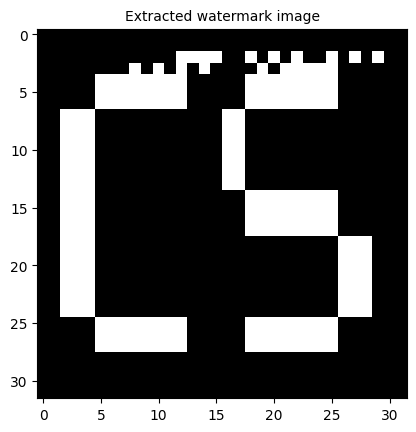

In [139]:
plt.imshow(X= watermark_image_new, cmap= plt.cm.gray)
plt.title(label= "Extracted watermark image", fontsize= 10)
plt.show()

In [140]:
# Applying attacks on watermarked image
# 10. Histogram Equalization rescaling
attacked_image= watermarked_image.copy()
# creating a Histograms Equalization of a image using cv2.equalizeHist()
attacked_image= attacked_image.astype(dtype= "uint8")
histogram_equalization_image= cv2.equalizeHist(src= attacked_image)
print(histogram_equalization_image.shape)
histogram_equalization_image

(512, 512)


array([[203, 203, 201, ..., 203, 175, 157],
       [203, 203, 201, ..., 208, 182, 165],
       [203, 203, 201, ..., 214, 195, 175],
       ...,
       [ 11,  13,  20, ...,  85,  83,  83],
       [ 10,  15,  20, ...,  89,  91,  91],
       [  8,  13,  20, ...,  91,  92,  93]], dtype=uint8)

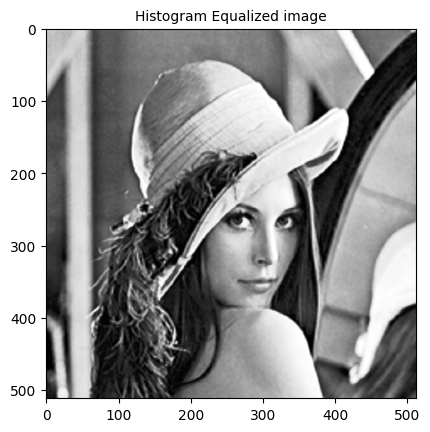

In [141]:
plt.imshow(X= histogram_equalization_image, cmap= plt.cm.gray)
plt.title(label= "Histogram Equalized image", fontsize= 10)
plt.show()

In [142]:
calculate_mse_psnr(original_image, histogram_equalization_image, max_pixel= 255)

Mean squared error is : 107.0428 and PSNR score is : 27.8352


Shape of the attacked image is : (512, 512)
Shapes of 1st level DWT coefficients are : (256, 256) (256, 256) (256, 256)
Shapes of 2nd level DWT coefficients are : (128, 128) (128, 128) (128, 128) (128, 128)


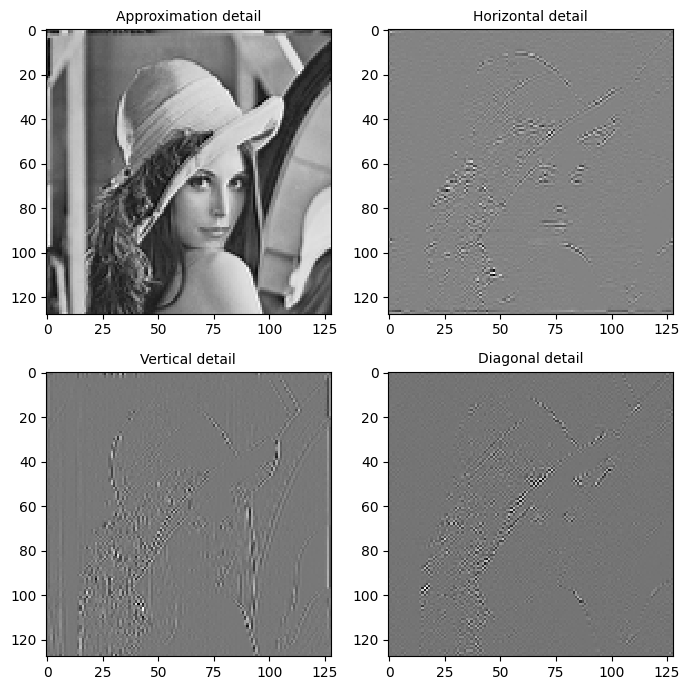

In [143]:
# Applying 2 level Digital Wavelet Transform to the attacked image and plotting approximation and details
print("Shape of the attacked image is :", histogram_equalization_image.shape)
coefficients= pywt.wavedec2(data= histogram_equalization_image, wavelet= "db5", mode= "periodization", level= 2, axes= (-2, -1))
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)= coefficients
print("Shapes of 1st level DWT coefficients are :", cH1.shape, cV1.shape, cD1.shape)
print("Shapes of 2nd level DWT coefficients are :", cA2.shape, cH2.shape, cV2.shape, cD2.shape)
plt.figure(figsize= (7, 7))
plt.subplot(2, 2, 1)
plt.imshow(X= cA2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Approximation detail", fontsize= 10)

plt.subplot(2, 2, 2)
plt.imshow(X= cH2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Horizontal detail", fontsize= 10)

plt.subplot(2, 2, 3)
plt.imshow(X= cV2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Vertical detail", fontsize= 10)

plt.subplot(2, 2, 4)
plt.imshow(X= cD2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Diagonal detail", fontsize= 10)
plt.tight_layout()
plt.show()

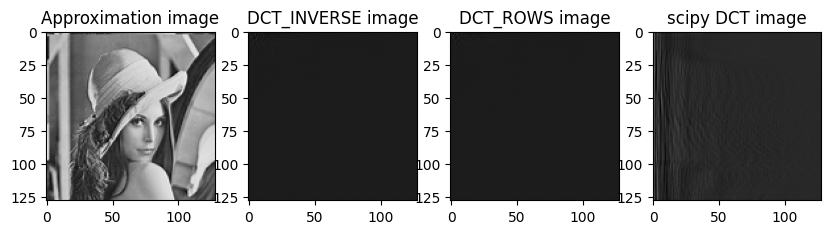

In [144]:
# Applying DCT on approximation sub- band
plt.figure(figsize= (10, 5))
plt.subplot(1, 4, 1)
plt.imshow(X= cA2, cmap= plt.cm.gray)
plt.title("Approximation image")
imf = numpy.float32(cA2) # float conversion
dst = cv2.dct(imf, cv2.DCT_INVERSE)
plt.subplot(1, 4, 2)
plt.imshow(X= dst, cmap= plt.cm.gray)
plt.title("DCT_INVERSE image")
dct = cv2.dct(imf, cv2.DCT_ROWS)
plt.subplot(1, 4, 3)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("DCT_ROWS image")
dct= scipy.fft.dct(x= cA2, type= 2, n= None)
plt.subplot(1, 4, 4)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("scipy DCT image")
plt.show()

In [145]:
dct_image= scipy.fft.dct(x= cA2, type= 2, n= None)
# dct_image= dct_image.astype(dtype= int)
print(dct_image.shape)

(128, 128)


In [146]:
dct_image_2= dct_image.reshape((128* 128))
print(dct_image_2.shape)
dct_image_2

(16384,)


array([ 1.18703855e+05, -9.61063887e+03, -1.08953730e+04, ...,
       -2.96819763e+02, -9.16514267e+02,  9.78265358e+01])

In [147]:
watermark_image_list= []
for i in range(len(extraction_indexes_list)):
    if dct_image_2[extraction_indexes_list[i]] < 0:
        watermark_image_list.append(1)
    elif dct_image_2[extraction_indexes_list[i]] >= 0:
        watermark_image_list.append(0)
watermark_image_new= numpy.array(watermark_image_list).reshape((32, 32))
print(watermark_image_new.shape)

(32, 32)


In [148]:
# Comparing original watermark and new watermark image
nc_score= calculate_nc_score(original_watermark_image, watermark_image_new)
print("Normalized correlation score is :", nc_score)
calculate_mse_psnr(original_watermark_image, watermark_image_new, max_pixel= 1)

Normalized correlation score is : 0.9456
Mean squared error is : 0.0322 and PSNR score is : 14.9179


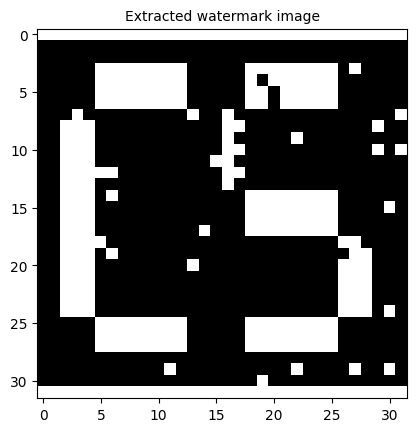

In [149]:
plt.imshow(X= watermark_image_new, cmap= plt.cm.gray)
plt.title(label= "Extracted watermark image", fontsize= 10)
plt.show()

In [150]:
# Applying attacks on watermarked image
# 11. Gamma correction
# scaling the pixel intensities to the range [0, 1.0], apply the transform, and then scale back to the range [0, 255]
attacked_image= watermarked_image.copy()
gamma_value= 1.50
gamma_corrected_image= numpy.array(255* (attacked_image / 255) ** gamma_value, dtype= "float32")    # Applying gamma correction
gamma_corrected_image

array([[129.09444 , 129.09187 , 127.903435, ..., 127.96994 , 113.929825,
        104.85005 ],
       [129.09406 , 129.09157 , 127.90307 , ..., 132.76767 , 117.38737 ,
        108.21393 ],
       [129.09381 , 129.09128 , 127.90275 , ..., 138.84633 , 123.22529 ,
        113.8983  ],
       ...,
       [ 18.889313,  19.521276,  21.466114, ...,  63.59598 ,  62.649117,
         62.624207],
       [ 18.262585,  20.161427,  21.465887, ...,  65.49425 ,  66.44485 ,
         66.41899 ],
       [ 17.64314 ,  19.521027,  21.465664, ...,  66.45021 ,  67.40551 ,
         68.34423 ]], dtype=float32)

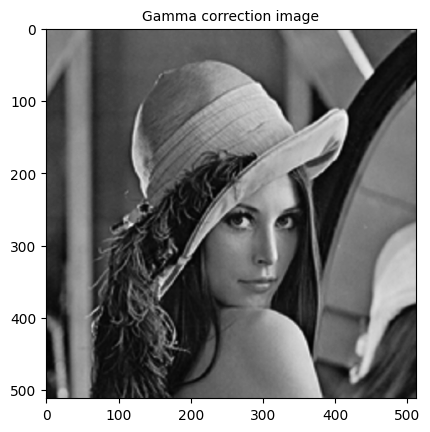

In [151]:
plt.imshow(X= gamma_corrected_image, cmap= plt.cm.gray)
plt.title(label= "Gamma correction image", fontsize= 10)
plt.show()

In [152]:
calculate_mse_psnr(original_image, gamma_corrected_image, max_pixel= 255)

Mean squared error is : 1095.5105 and PSNR score is : 17.7346


Shape of the attacked image is : (512, 512)
Shapes of 1st level DWT coefficients are : (256, 256) (256, 256) (256, 256)
Shapes of 2nd level DWT coefficients are : (128, 128) (128, 128) (128, 128) (128, 128)


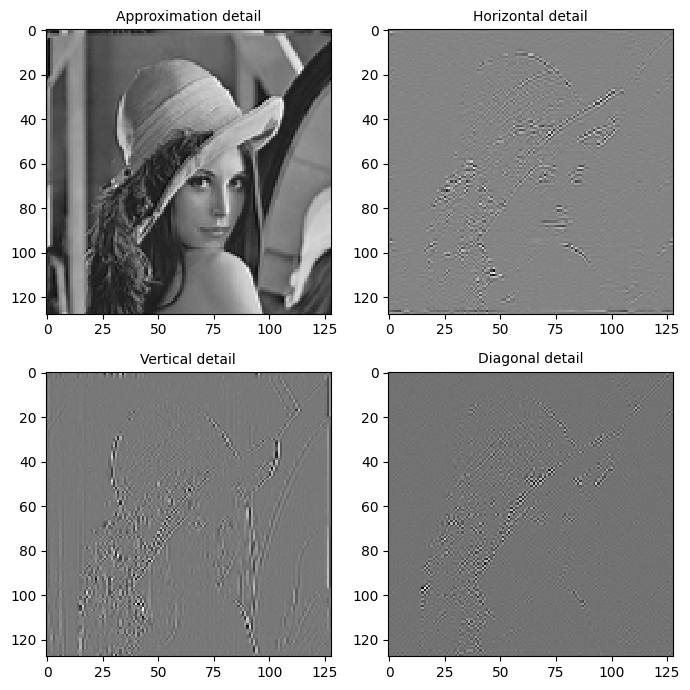

In [153]:
# Applying 2 level Digital Wavelet Transform to the attacked image and plotting approximation and details
print("Shape of the attacked image is :", gamma_corrected_image.shape)
coefficients= pywt.wavedec2(data= gamma_corrected_image, wavelet= "db5", mode= "periodization", level= 2, axes= (-2, -1))
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)= coefficients
print("Shapes of 1st level DWT coefficients are :", cH1.shape, cV1.shape, cD1.shape)
print("Shapes of 2nd level DWT coefficients are :", cA2.shape, cH2.shape, cV2.shape, cD2.shape)
plt.figure(figsize= (7, 7))
plt.subplot(2, 2, 1)
plt.imshow(X= cA2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Approximation detail", fontsize= 10)

plt.subplot(2, 2, 2)
plt.imshow(X= cH2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Horizontal detail", fontsize= 10)

plt.subplot(2, 2, 3)
plt.imshow(X= cV2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Vertical detail", fontsize= 10)

plt.subplot(2, 2, 4)
plt.imshow(X= cD2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Diagonal detail", fontsize= 10)
plt.tight_layout()
plt.show()

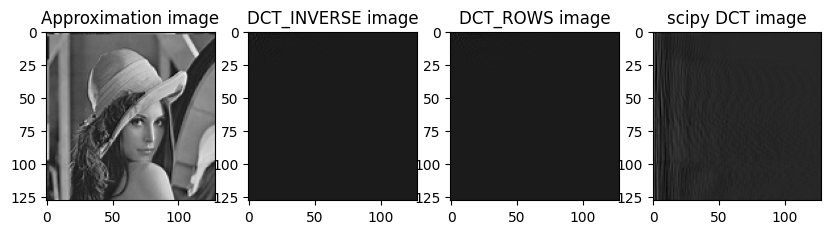

In [154]:
# Applying DCT on approximation sub- band
plt.figure(figsize= (10, 5))
plt.subplot(1, 4, 1)
plt.imshow(X= cA2, cmap= plt.cm.gray)
plt.title("Approximation image")
imf = numpy.float32(cA2) # float conversion
dst = cv2.dct(imf, cv2.DCT_INVERSE)
plt.subplot(1, 4, 2)
plt.imshow(X= dst, cmap= plt.cm.gray)
plt.title("DCT_INVERSE image")
dct = cv2.dct(imf, cv2.DCT_ROWS)
plt.subplot(1, 4, 3)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("DCT_ROWS image")
dct= scipy.fft.dct(x= cA2, type= 2, n= None)
plt.subplot(1, 4, 4)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("scipy DCT image")
plt.show()

In [155]:
dct_image= scipy.fft.dct(x= cA2, type= 2, n= None)
# dct_image= dct_image.astype(dtype= int)
print(dct_image.shape)

(128, 128)


In [156]:
dct_image_2= dct_image.reshape((128* 128))
print(dct_image_2.shape)
dct_image_2

(16384,)


array([ 8.4706836e+04, -6.6953799e+03, -6.2900986e+03, ...,
       -4.9425781e+01, -6.4282202e+02,  1.4003223e+02], dtype=float32)

In [157]:
watermark_image_list= []
for i in range(len(extraction_indexes_list)):
    if dct_image_2[extraction_indexes_list[i]] < 0:
        watermark_image_list.append(1)
    elif dct_image_2[extraction_indexes_list[i]] >= 0:
        watermark_image_list.append(0)
watermark_image_new= numpy.array(watermark_image_list).reshape((32, 32))
print(watermark_image_new.shape)

(32, 32)


In [158]:
# Comparing original watermark and new watermark image
nc_score= calculate_nc_score(original_watermark_image, watermark_image_new)
print("Normalized correlation score is :", nc_score)
calculate_mse_psnr(original_watermark_image, watermark_image_new, max_pixel= 1)

Normalized correlation score is : 0.936
Mean squared error is : 0.0381 and PSNR score is : 14.1924


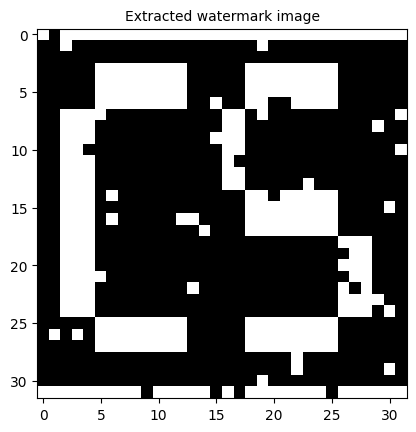

In [159]:
plt.imshow(X= watermark_image_new, cmap= plt.cm.gray)
plt.title(label= "Extracted watermark image", fontsize= 10)
plt.show()

In [160]:
# Applying attacks on watermarked image
# 12. AWGN (Additive white Gaussian noise)
# Additive white Gaussian noise (AWGN), another name for Gaussian noise, has a Gaussian distribution. Signal transmission, sensor limits and electrical components are the factors that bring about the random changes that arise. Gaussian noise appears as a soft, undetectable disturbance that gives pixels random values.
attacked_image= watermarked_image.copy()
row, col= attacked_image.shape
mean= 0
var= 1
sigma= var**0.5
gauss_noise= numpy.random.normal(mean, sigma, (row, col))
gaussian_noise_image= attacked_image + gauss_noise

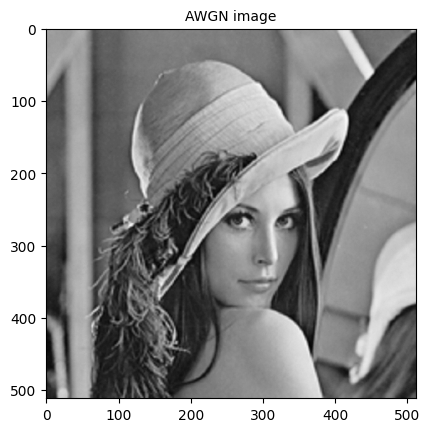

In [161]:
plt.imshow(X= gaussian_noise_image, cmap= plt.cm.gray)
plt.title(label= "AWGN image", fontsize= 10)
plt.show()

In [162]:
calculate_mse_psnr(original_image, gaussian_noise_image, max_pixel= 255)

Mean squared error is : 1.0041 and PSNR score is : 48.1129


Shape of the attacked image is : (512, 512)
Shapes of 1st level DWT coefficients are : (256, 256) (256, 256) (256, 256)
Shapes of 2nd level DWT coefficients are : (128, 128) (128, 128) (128, 128) (128, 128)


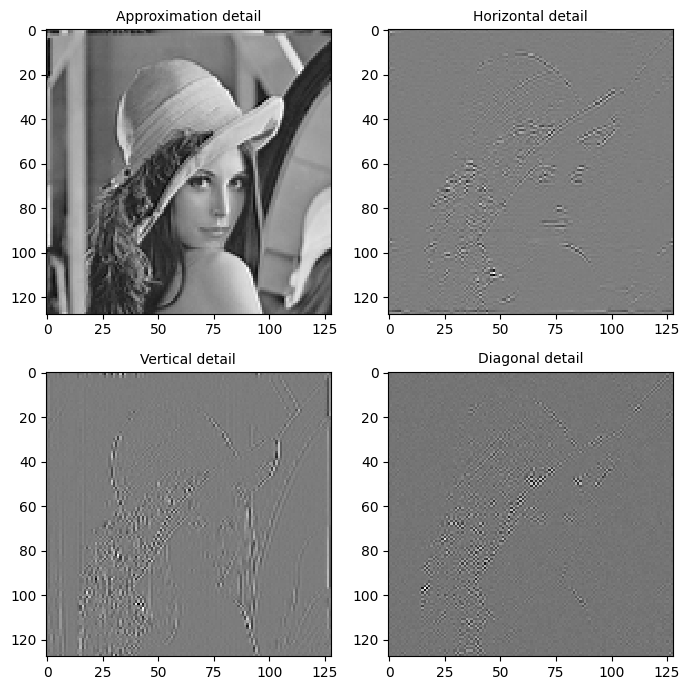

In [163]:
# Applying 2 level Digital Wavelet Transform to the attacked image and plotting approximation and details
print("Shape of the attacked image is :", gaussian_noise_image.shape)
coefficients= pywt.wavedec2(data= gaussian_noise_image, wavelet= "db5", mode= "periodization", level= 2, axes= (-2, -1))
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)= coefficients
print("Shapes of 1st level DWT coefficients are :", cH1.shape, cV1.shape, cD1.shape)
print("Shapes of 2nd level DWT coefficients are :", cA2.shape, cH2.shape, cV2.shape, cD2.shape)
plt.figure(figsize= (7, 7))
plt.subplot(2, 2, 1)
plt.imshow(X= cA2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Approximation detail", fontsize= 10)

plt.subplot(2, 2, 2)
plt.imshow(X= cH2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Horizontal detail", fontsize= 10)

plt.subplot(2, 2, 3)
plt.imshow(X= cV2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Vertical detail", fontsize= 10)

plt.subplot(2, 2, 4)
plt.imshow(X= cD2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Diagonal detail", fontsize= 10)
plt.tight_layout()
plt.show()

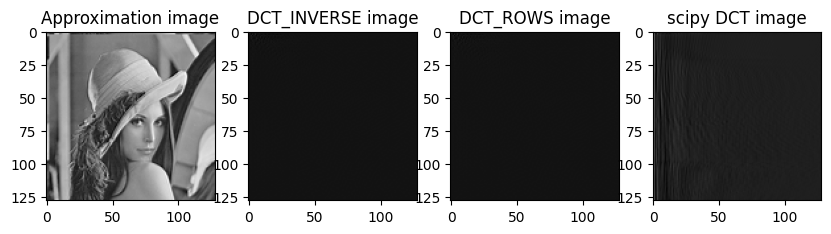

In [164]:
# Applying DCT on approximation sub- band
plt.figure(figsize= (10, 5))
plt.subplot(1, 4, 1)
plt.imshow(X= cA2, cmap= plt.cm.gray)
plt.title("Approximation image")
imf = numpy.float32(cA2) # float conversion
dst = cv2.dct(imf, cv2.DCT_INVERSE)
plt.subplot(1, 4, 2)
plt.imshow(X= dst, cmap= plt.cm.gray)
plt.title("DCT_INVERSE image")
dct = cv2.dct(imf, cv2.DCT_ROWS)
plt.subplot(1, 4, 3)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("DCT_ROWS image")
dct= scipy.fft.dct(x= cA2, type= 2, n= None)
plt.subplot(1, 4, 4)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("scipy DCT image")
plt.show()

In [165]:
dct_image= scipy.fft.dct(x= cA2, type= 2, n= None)
# dct_image= dct_image.astype(dtype= int)
print(dct_image.shape)

(128, 128)


In [166]:
dct_image_2= dct_image.reshape((128* 128))
print(dct_image_2.shape)
dct_image_2

(16384,)


array([ 1.18835750e+05, -7.50576476e+03, -6.92748379e+03, ...,
       -2.22208761e+02, -7.21710237e+02,  3.47772999e+00])

In [167]:
watermark_image_list= []
for i in range(len(extraction_indexes_list)):
    if dct_image_2[extraction_indexes_list[i]] < 0:
        watermark_image_list.append(1)
    elif dct_image_2[extraction_indexes_list[i]] >= 0:
        watermark_image_list.append(0)
watermark_image_new= numpy.array(watermark_image_list).reshape((32, 32))
print(watermark_image_new.shape)

(32, 32)


In [168]:
# Comparing original watermark and new watermark image
nc_score= calculate_nc_score(original_watermark_image, watermark_image_new)
print("Normalized correlation score is :", nc_score)
calculate_mse_psnr(original_watermark_image, watermark_image_new, max_pixel= 1)

Normalized correlation score is : 0.995
Mean squared error is : 0.0029 and PSNR score is : 25.3318


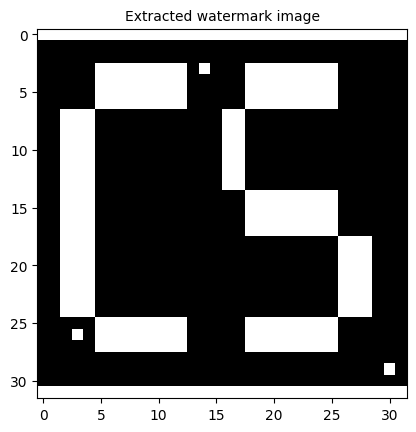

In [169]:
plt.imshow(X= watermark_image_new, cmap= plt.cm.gray)
plt.title(label= "Extracted watermark image", fontsize= 10)
plt.show()

In [170]:
# Applying attacks on watermarked image
# 13. Scaling
attacked_image= watermarked_image.copy()
upscaled_image= cv2.resize(src= attacked_image, dsize= (1024, 1024))
print(upscaled_image.shape)
downscaled_image= cv2.resize(src= upscaled_image, dsize= (512, 512))
print(downscaled_image.shape)

(1024, 1024)
(512, 512)


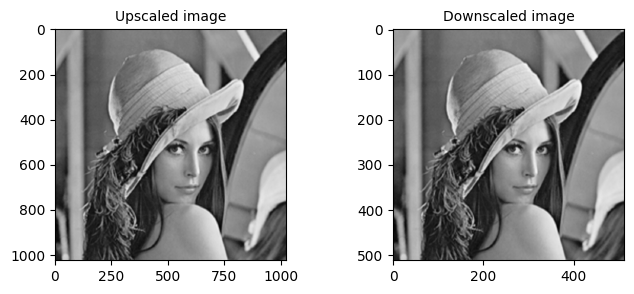

In [171]:
plt.figure(figsize= (8, 3))
plt.subplot(1, 2, 1)
plt.imshow(X= upscaled_image, cmap= plt.cm.gray)
plt.title(label= "Upscaled image", fontsize= 10)
plt.subplot(1, 2, 2)
plt.imshow(X= downscaled_image, cmap= plt.cm.gray)
plt.title(label= "Downscaled image", fontsize= 10)
plt.show()

In [172]:
calculate_mse_psnr(original_image, downscaled_image, max_pixel= 255)

Mean squared error is : 0.9425 and PSNR score is : 48.388


Shape of the attacked image is : (512, 512)
Shapes of 1st level DWT coefficients are : (256, 256) (256, 256) (256, 256)
Shapes of 2nd level DWT coefficients are : (128, 128) (128, 128) (128, 128) (128, 128)


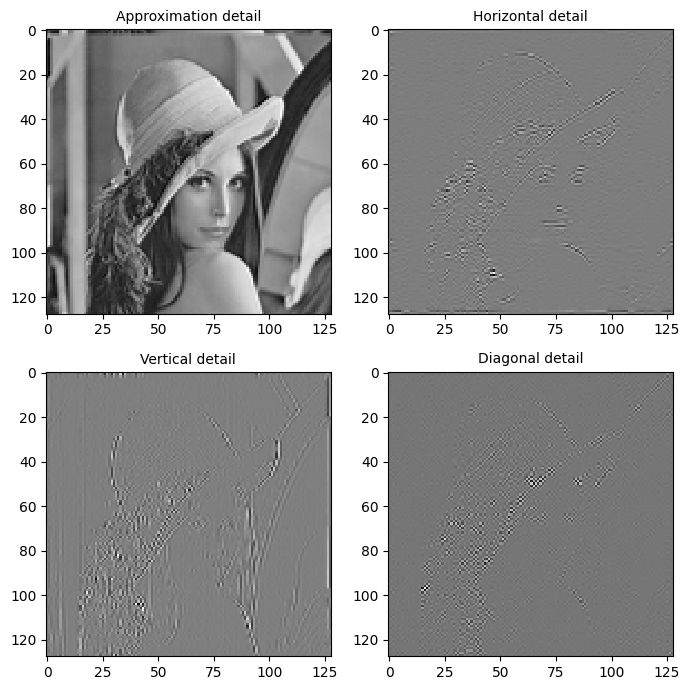

In [173]:
# Applying 2 level Digital Wavelet Transform to the attacked image and plotting approximation and details
print("Shape of the attacked image is :", downscaled_image.shape)
coefficients= pywt.wavedec2(data= downscaled_image, wavelet= "db5", mode= "periodization", level= 2, axes= (-2, -1))
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)= coefficients
print("Shapes of 1st level DWT coefficients are :", cH1.shape, cV1.shape, cD1.shape)
print("Shapes of 2nd level DWT coefficients are :", cA2.shape, cH2.shape, cV2.shape, cD2.shape)
plt.figure(figsize= (7, 7))
plt.subplot(2, 2, 1)
plt.imshow(X= cA2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Approximation detail", fontsize= 10)

plt.subplot(2, 2, 2)
plt.imshow(X= cH2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Horizontal detail", fontsize= 10)

plt.subplot(2, 2, 3)
plt.imshow(X= cV2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Vertical detail", fontsize= 10)

plt.subplot(2, 2, 4)
plt.imshow(X= cD2, interpolation= "nearest", cmap= plt.cm.gray)
plt.title(label= "Diagonal detail", fontsize= 10)
plt.tight_layout()
plt.show()

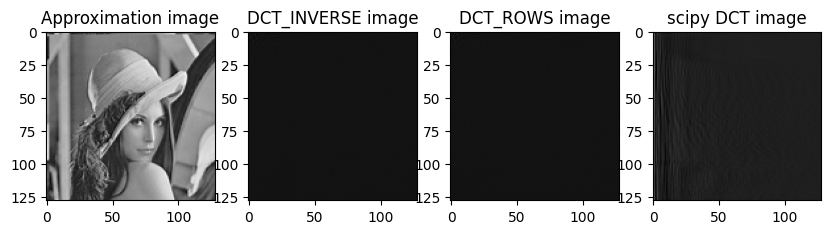

In [174]:
# Applying DCT on approximation sub- band
plt.figure(figsize= (10, 5))
plt.subplot(1, 4, 1)
plt.imshow(X= cA2, cmap= plt.cm.gray)
plt.title("Approximation image")
imf = numpy.float32(cA2) # float conversion
dst = cv2.dct(imf, cv2.DCT_INVERSE)
plt.subplot(1, 4, 2)
plt.imshow(X= dst, cmap= plt.cm.gray)
plt.title("DCT_INVERSE image")
dct = cv2.dct(imf, cv2.DCT_ROWS)
plt.subplot(1, 4, 3)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("DCT_ROWS image")
dct= scipy.fft.dct(x= cA2, type= 2, n= None)
plt.subplot(1, 4, 4)
plt.imshow(X= dct, cmap= plt.cm.gray)
plt.title("scipy DCT image")
plt.show()

In [175]:
dct_image= scipy.fft.dct(x= cA2, type= 2, n= None)
# dct_image= dct_image.astype(dtype= int)
print(dct_image.shape)

(128, 128)


In [176]:
dct_image_2= dct_image.reshape((128* 128))
print(dct_image_2.shape)
dct_image_2

(16384,)


array([ 1.1881508e+05, -7.5201587e+03, -6.9439375e+03, ...,
       -2.2153418e+02, -6.5764771e+02,  6.6860352e+00], dtype=float32)

In [177]:
watermark_image_list= []
for i in range(len(extraction_indexes_list)):
    if dct_image_2[extraction_indexes_list[i]] < 0:
        watermark_image_list.append(1)
    elif dct_image_2[extraction_indexes_list[i]] >= 0:
        watermark_image_list.append(0)
watermark_image_new= numpy.array(watermark_image_list).reshape((32, 32))
print(watermark_image_new.shape)

(32, 32)


In [178]:
# Comparing original watermark and new watermark image
nc_score= calculate_nc_score(original_watermark_image, watermark_image_new)
print("Normalized correlation score is :", nc_score)
calculate_mse_psnr(original_watermark_image, watermark_image_new, max_pixel= 1)

Normalized correlation score is : 0.9899
Mean squared error is : 0.0059 and PSNR score is : 22.3215


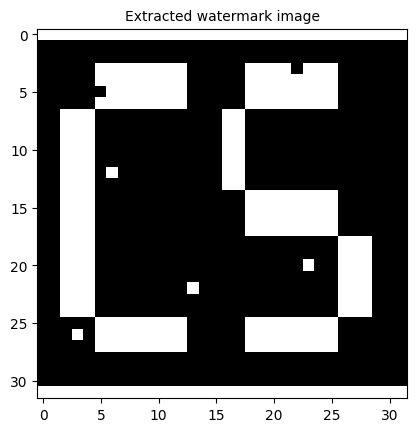

In [179]:
plt.imshow(X= watermark_image_new, cmap= plt.cm.gray)
plt.title(label= "Extracted watermark image", fontsize= 10)
plt.show()

In [180]:
gc.collect()

33315